# Time series Analysis with FB Prophet

In [38]:
import yfinance as yf
import prophet as Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")

### Plot settings

In [210]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [40]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [41]:
ticker_list = ["GOOG", "VTI"]

data = yf.download(ticker_list, start = start_date, end= end_date)[["Close"]]

data.head()

[*********************100%***********************]  2 of 2 completed


Close            
                 GOOG         VTI
Date                             
2020-01-02  68.368500  164.979996
2020-01-03  68.032997  163.929993
2020-01-06  69.710503  164.490005
2020-01-07  69.667000  164.100006
2020-01-08  70.216003  164.910004

In [42]:
data.shape

(672, 2)

In [43]:
data.describe().T

count        mean        std         min         25%        50%  \
Close GOOG  672.0  105.786198  28.218500   52.831001   76.034252  111.28875   
      VTI   672.0  197.082946  30.537813  111.910004  171.127502  203.62500   

                   75%         max  
Close GOOG  132.381500  150.709000  
      VTI   222.850006  242.970001

In [44]:
data.columns = data.columns.droplevel(0)

In [45]:
data.head()

,GOOG,VTI
Date,,
2020-01-02,68.368500,164.979996
2020-01-03,68.032997,163.929993
2020-01-06,69.710503,164.490005
2020-01-07,69.667000,164.100006
2020-01-08,70.216003,164.910004


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 672 entries, 2020-01-02 to 2022-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOG    672 non-null    float64
 1   VTI     672 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


## visualization on time series data


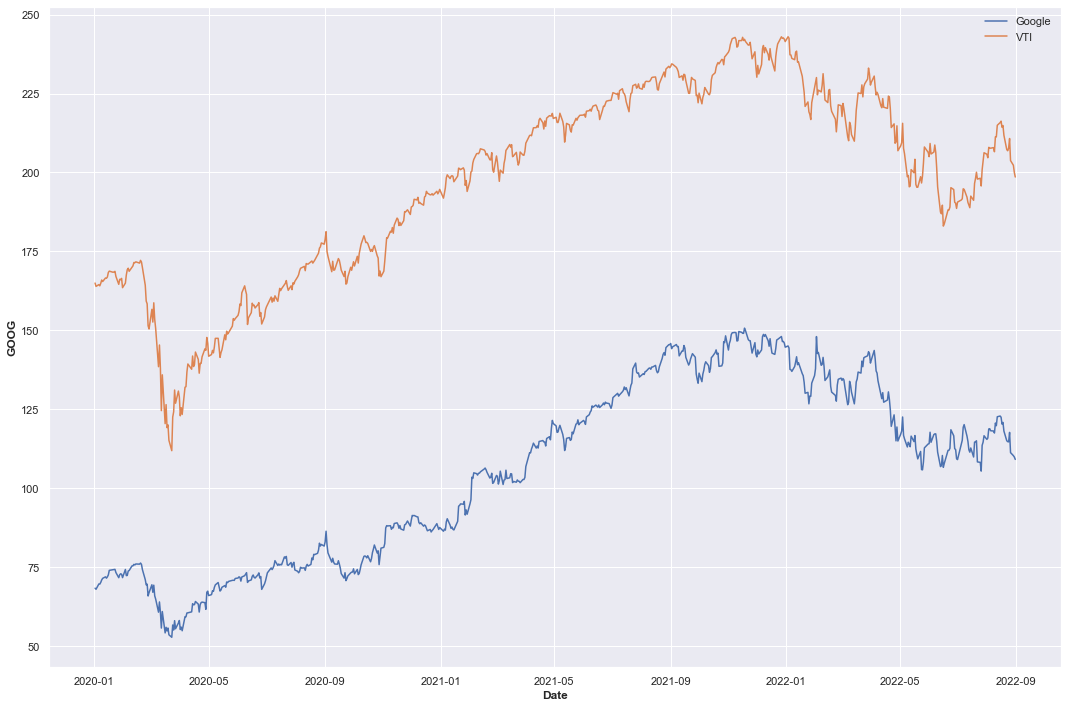

In [49]:
sns.set(rc={"figure.figsize":(15,10)})
sns.lineplot(x= data.index, y=data.GOOG)
sns.lineplot(x= data.index, y=data.VTI)
plt.legend(["Google", "VTI"])
plt.show()

## Preprocess data for Prophet

In [50]:
data = data.reset_index()

In [51]:
data.columns = ["ds", "y", "VTI"]

In [52]:
data.head()

,ds,y,VTI
0,2020-01-02,68.368500,164.979996
1,2020-01-03,68.032997,163.929993
2,2020-01-06,69.710503,164.490005
3,2020-01-07,69.667000,164.100006
4,2020-01-08,70.216003,164.910004


## Correlation indicating that there is high correlation between two prices (0.963)

In [53]:
data.corrwith(data["y"])

y      1.000000
VTI    0.963487
dtype: float64

In [54]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [55]:
test.shape

(13, 3)

In [56]:
train.shape

(659, 3)

In [57]:
train["ds"].min()

Timestamp('2020-01-02 00:00:00')

In [58]:
train["ds"].max()

Timestamp('2022-08-12 00:00:00')

In [59]:
test["ds"].min()

Timestamp('2022-08-15 00:00:00')

In [60]:
test["ds"].max()

Timestamp('2022-08-31 00:00:00')

## Fit data with default model

In [61]:
model_baseline = Prophet.Prophet()

In [62]:
model_baseline.fit(train)

17:50:06 - cmdstanpy - INFO - Chain [1] start processing
17:50:06 - cmdstanpy - INFO - Chain [1] done processing


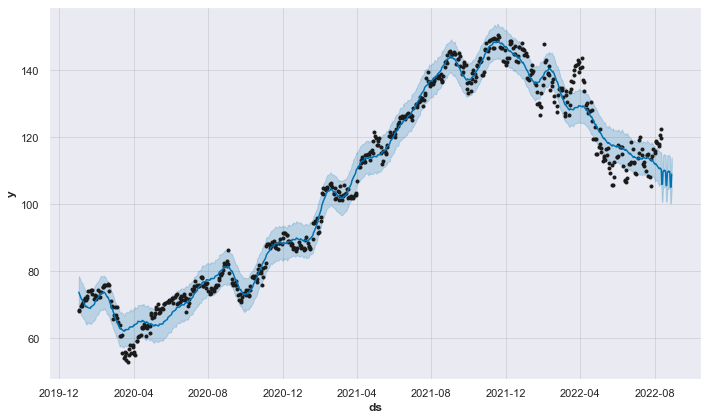

In [63]:
future_baseline = model_baseline.make_future_dataframe(periods=17)
forecast_baseline = model_baseline.predict(future_baseline)
model_baseline.plot(forecast_baseline);

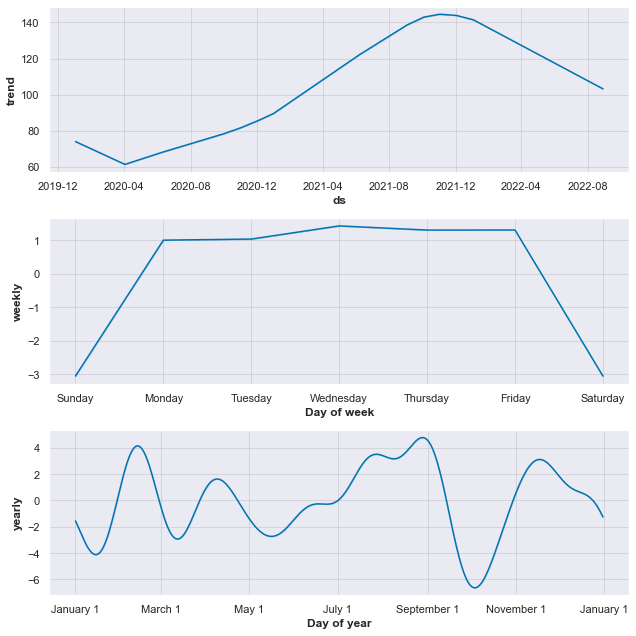

In [64]:
model_baseline.plot_components(forecast_baseline);

In [65]:
forecast_baseline.shape

(676, 19)

In [66]:
forecast_baseline.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,74.072569,68.873274,78.585242,74.072569,74.072569,-0.305999,-0.305999,-0.305999,1.308865,1.308865,1.308865,-1.614864,-1.614864,-1.614864,0.0,0.0,0.0,73.766570
1,2020-01-03,73.933716,68.478427,78.319392,73.933716,73.933716,-0.553556,-0.553556,-0.553556,1.310442,1.310442,1.310442,-1.863998,-1.863998,-1.863998,0.0,0.0,0.0,73.380159
2,2020-01-06,73.517155,66.790318,76.773288,73.517155,73.517155,-1.615116,-1.615116,-1.615116,1.007721,1.007721,1.007721,-2.622837,-2.622837,-2.622837,0.0,0.0,0.0,71.902039
3,2020-01-07,73.378302,66.709712,76.483509,73.378302,73.378302,-1.826906,-1.826906,-1.826906,1.040484,1.040484,1.040484,-2.867390,-2.867390,-2.867390,0.0,0.0,0.0,71.551396
4,2020-01-08,73.239448,66.612885,76.557505,73.239448,73.239448,-1.668215,-1.668215,-1.668215,1.432941,1.432941,1.432941,-3.101156,-3.101156,-3.101156,0.0,0.0,0.0,71.571234


In [67]:
performance_baseline = pd.merge(test, forecast_baseline[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [68]:
performance_baseline.shape

(11, 6)

In [69]:
performance_baseline

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,109.926409,105.367361,114.672046
1,2022-08-16,122.510002,216.240005,109.894175,105.284091,114.966930
2,2022-08-17,120.320000,214.300003,110.233393,105.110566,115.017144
3,2022-08-18,120.860001,214.860001,110.065783,105.170559,114.640348
4,2022-08-19,118.120003,211.789993,110.031058,105.115647,114.773499
5,2022-08-22,115.070000,207.259995,109.632757,104.880041,114.765276
6,2022-08-23,114.769997,206.869995,109.626675,104.537011,114.537806
7,2022-08-24,114.699997,207.740005,109.970605,105.395877,114.672630
8,2022-08-25,117.699997,210.750000,109.784472,104.726187,114.722865
9,2022-08-26,111.300003,203.770004,109.706628,105.050409,114.275718


In [70]:
performance_baseline_MAE = mean_absolute_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAE

7.333910942116933

In [71]:
performance_baseline_MAPE = mean_absolute_percentage_error(performance_baseline["y"], performance_baseline["yhat"])
performance_baseline_MAPE

0.061527476924947574

__mape base prophet model__

## Prophet model with seasonal attributes
---

In [72]:
model_season = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=False)

In [73]:
model_season.fit(train)

17:50:34 - cmdstanpy - INFO - Chain [1] start processing
17:50:34 - cmdstanpy - INFO - Chain [1] done processing


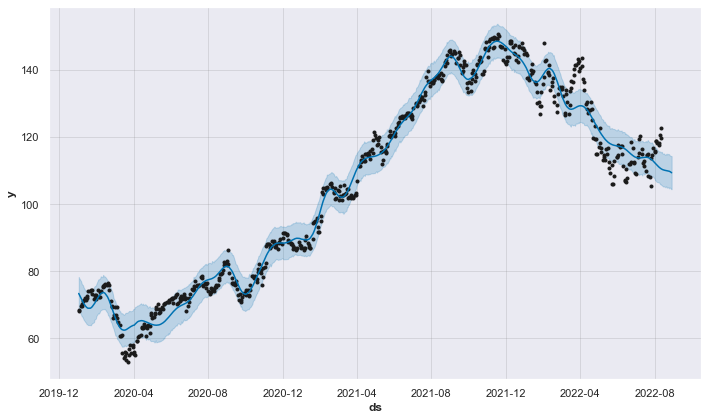

In [74]:
future_season = model_season.make_future_dataframe(periods=17)
forecast_season = model_season.predict(future_season)
model_season.plot(forecast_season);

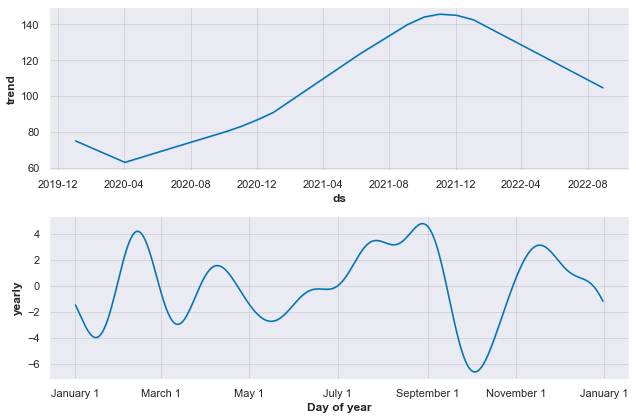

In [75]:
model_season.plot_components(forecast_season);

In [76]:
performance_season = pd.merge(test, forecast_season[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [77]:
performance_season.shape

(11, 6)

In [78]:
performance_season_mae = mean_absolute_error(performance_season["y"], performance_season["yhat"])
performance_season_mae

7.2263987236357075

In [79]:
performance_season_mape = mean_absolute_percentage_error(performance_season["y"], performance_season["yhat"])
performance_season_mape

0.06060487000676184

__mape is slightly decreased__

## Prophet Model with Multivariate
---

In [80]:
model_multivariate = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True)

### VTI added as additional predictor

In [81]:
model_multivariate.add_regressor("VTI", standardize=False)
model_multivariate.fit(train)

17:50:58 - cmdstanpy - INFO - Chain [1] start processing
17:50:58 - cmdstanpy - INFO - Chain [1] done processing


In [82]:
future_multivariate = model_multivariate.make_future_dataframe(periods=17)
future_multivariate = pd.merge(future_multivariate, data[["ds", "VTI"]], on="ds", how="inner")
future_multivariate = future_multivariate.fillna(method="ffill")
future_multivariate.tail()

,ds,VTI
665,2022-08-23,206.869995
666,2022-08-24,207.740005
667,2022-08-25,210.750000
668,2022-08-26,203.770004
669,2022-08-29,202.279999


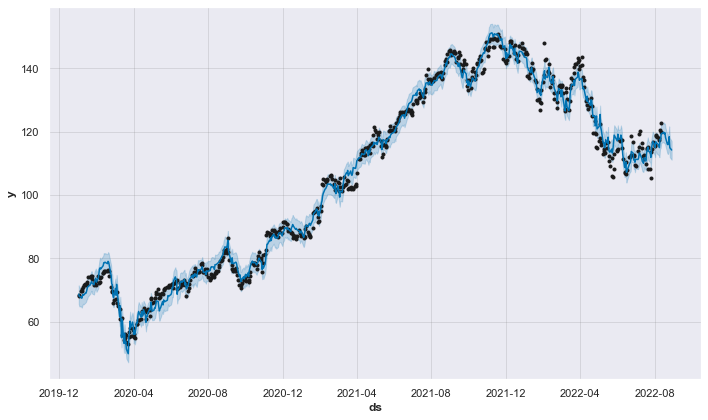

In [83]:
forecast_multivariate = model_multivariate.predict(future_multivariate)
model_multivariate.plot(forecast_multivariate);

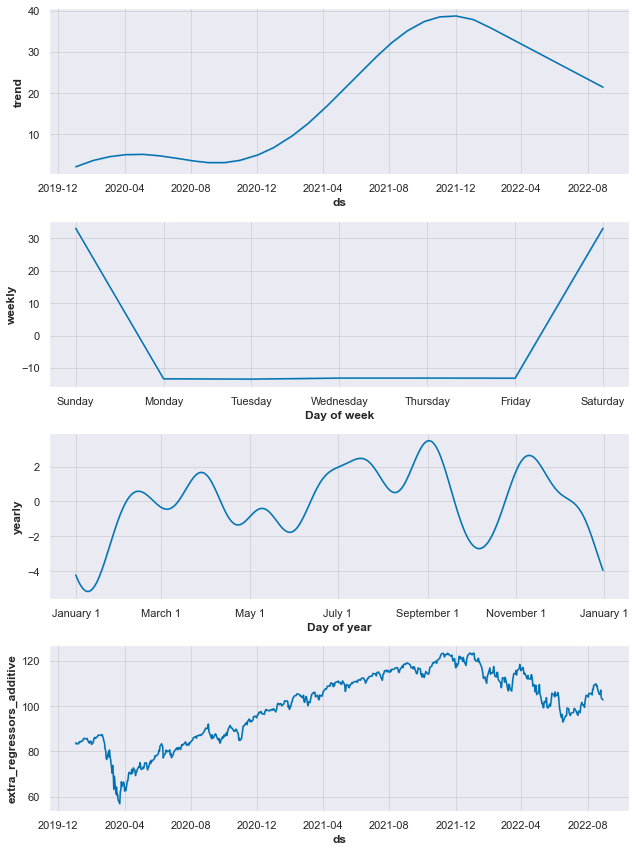

In [84]:
model_multivariate.plot_components(forecast_multivariate);

In [85]:
performance_multivariate = pd.merge(test, forecast_multivariate[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [86]:
performance_multivariate.shape

(11, 6)

In [87]:
performance_multivariate

,ds,y,VTI,yhat,yhat_lower,yhat_upper
0,2022-08-15,122.879997,215.779999,119.651702,116.660295,122.744495
1,2022-08-16,122.510002,216.240005,119.864422,116.675876,122.958165
2,2022-08-17,120.320000,214.300003,119.270646,116.339150,122.381717
3,2022-08-18,120.860001,214.860001,119.658820,116.374780,122.605453
4,2022-08-19,118.120003,211.789993,118.169272,115.438738,121.216272
5,2022-08-22,115.070000,207.259995,116.048934,113.165856,119.049939
6,2022-08-23,114.769997,206.869995,115.895915,112.931420,118.950962
7,2022-08-24,114.699997,207.740005,116.774798,113.650099,119.789068
8,2022-08-25,117.699997,210.750000,118.429018,115.321388,121.681191
9,2022-08-26,111.300003,203.770004,114.947761,111.931522,118.045543


In [88]:
performance_multivariate_mae = mean_absolute_error(performance_multivariate["y"], performance_multivariate["yhat"])
performance_multivariate_mae

1.8731383596941706

In [89]:
performance_multivariate_mape = mean_absolute_percentage_error(performance_multivariate["y"], performance_multivariate["yhat"])
performance_multivariate_mape

0.016130149784554192

__mape decreased__ multivariate ✔

## Prophet Model with Holidays and Event Effects
---

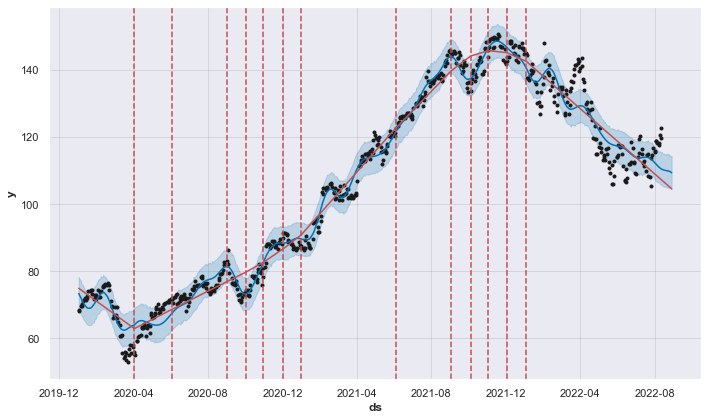

In [90]:
from prophet.plot import add_changepoints_to_plot
fig = model_season.plot(forecast_season)
a = add_changepoints_to_plot(fig.gca(), model_baseline, forecast_season)

### Creating events with extend days and concatenate into dataframe.

In [92]:
COVID = pd.DataFrame({
    'holiday': 'COVID',
    'ds': pd.to_datetime(['2020-03-15']),
    'lower_window': -15,
    'upper_window': 15,    
})

superbowl = pd.DataFrame({
    'holiday': 'superbowl',
    'ds': pd.to_datetime(['2020-02-02', '2021-02-07']),
    'lower_window': -7,
    'upper_window': 1,    
})

events = pd.concat((COVID, superbowl))

events

,holiday,ds,lower_window,upper_window
0,COVID,2020-03-15,-15,15
0,superbowl,2020-02-02,-7,1
1,superbowl,2021-02-07,-7,1


### Also adding built-in country-specific holidays for US into model.

In [93]:
model_holiday = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events)

model_holiday.add_country_holidays(country_name='US')

model_holiday.add_regressor('VTI', standardize=False)

model_holiday.fit(train)

model_holiday.train_holiday_names

17:52:26 - cmdstanpy - INFO - Chain [1] start processing
17:52:27 - cmdstanpy - INFO - Chain [1] done processing


0                                               COVID
1                                           superbowl
2                                      New Year's Day
3                          Martin Luther King Jr. Day
4                               Washington's Birthday
5                                        Memorial Day
6                                    Independence Day
7                         Independence Day (Observed)
8                                           Labor Day
9                                        Columbus Day
10                                       Veterans Day
11                                       Thanksgiving
12                                      Christmas Day
13                          New Year's Day (Observed)
14               Juneteenth National Independence Day
15    Juneteenth National Independence Day (Observed)
16                           Christmas Day (Observed)
dtype: object

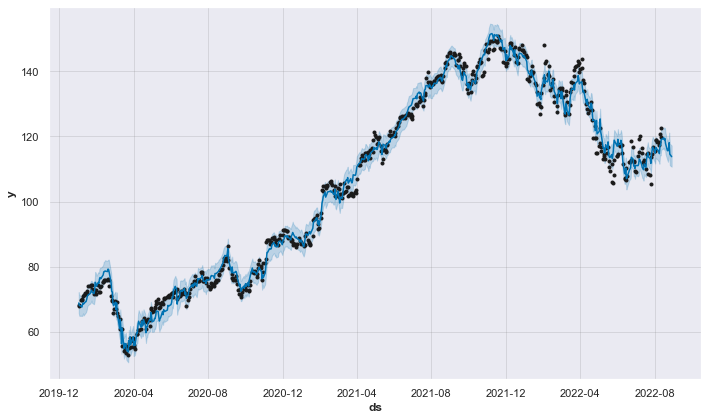

In [94]:
future_holiday = model_holiday.make_future_dataframe(periods=17)

future_holiday = pd.merge(future_holiday, data[['ds', 'VTI']], on='ds', how='inner')

future_holiday = future_holiday.fillna(method='ffill')

forecast_holiday = model_holiday.predict(future_holiday)

model_holiday.plot(forecast_holiday); 

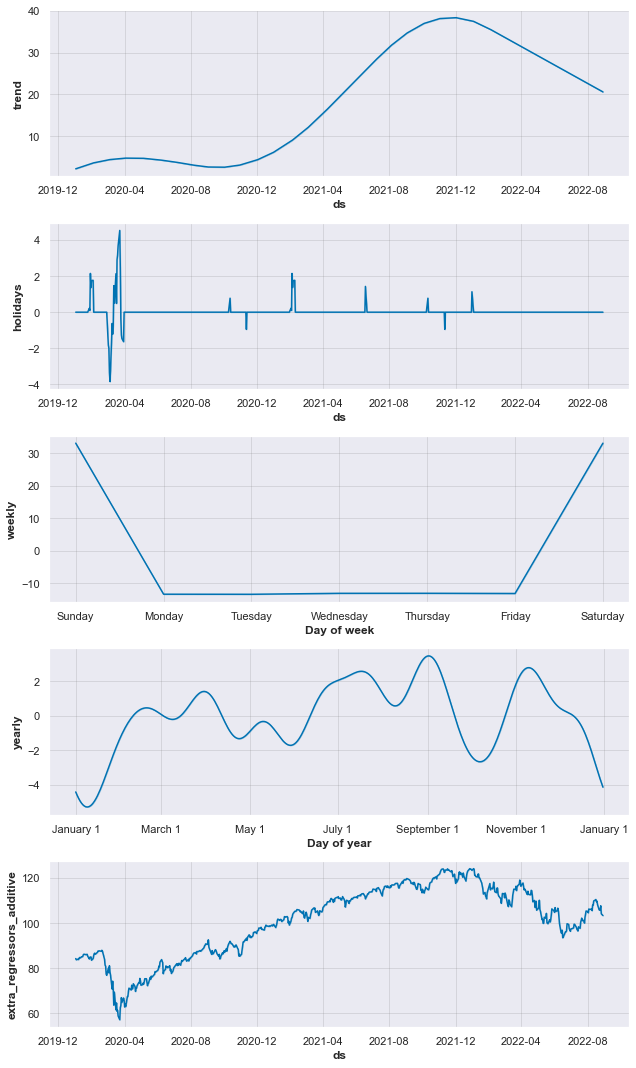

In [95]:
model_holiday.plot_components(forecast_holiday);

In [96]:
performance_holiday = pd.merge(test, forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')

performance_holiday_MAE = mean_absolute_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAE for the holiday/event model is {performance_holiday_MAE}')

performance_holiday_MAPE = mean_absolute_percentage_error(performance_holiday['y'], performance_holiday['yhat'])
print(f'The MAPE for the holiday/event model is {performance_holiday_MAPE}')

The MAE for the holiday/event model is 1.8044394756562965
The MAPE for the holiday/event model is 0.015457785815145304


__mape slightly decreased__ holiday ✔

### By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

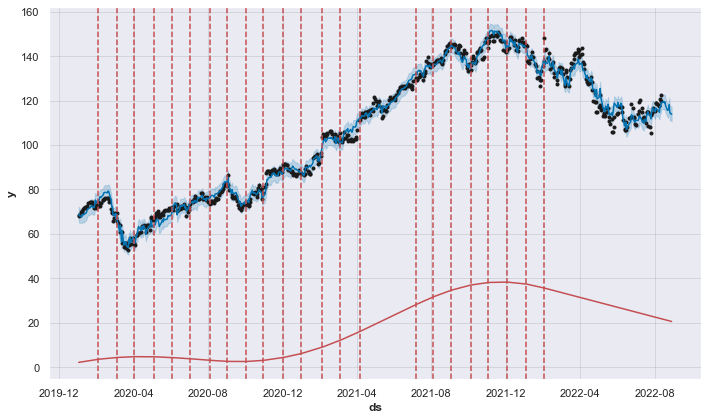

In [97]:
from prophet.plot import add_changepoints_to_plot
fig = model_holiday.plot(forecast_holiday)
a = add_changepoints_to_plot(fig.gca(), model_holiday, forecast_holiday)

### Even though we have a lot of places where the rate can possibly change, because of the sparse prior, most of these changepoints go unused. We can see this by plotting the magnitude of the rate change at each changepoint.

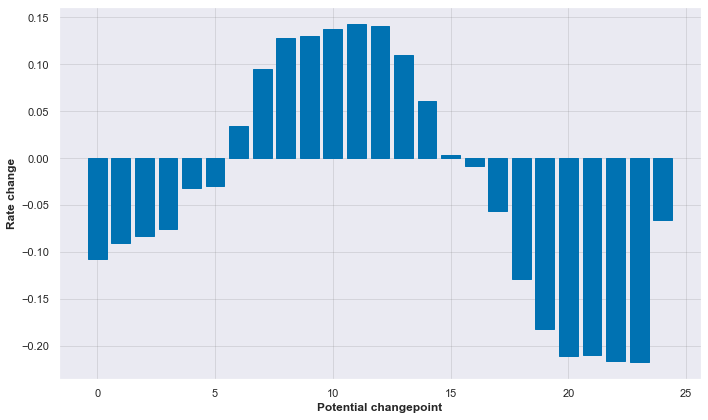

In [98]:
deltas = model_holiday.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas, facecolor='#0072B2', edgecolor='#0072B2')
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

### Prophet also have Cross-validation functionality to get the model performance.

In [99]:
from prophet.diagnostics import cross_validation, performance_metrics

- model=model_holiday specifies the model name.
- initial='366 days' means the initial model will be trained on the first 366 days of data.
- period='61 days' means 61 days will be added to the training dataset for each additional model.
- horizon = '122 days' means that the model forecasts the next 122 days. When only horizon is given, Prophet defaults initial to be triple the horizon, and period to be half of the horizon.
- parallel="processes" enables parallel processing for cross-validation. When the parallel cross-validation can be done on a single machine, "processes" provide the highest performance. For larger problems, dask can be used to do cross-validation on multiple machines.

In [100]:
model_baseline_cv = cross_validation(model=model_baseline,
                                   initial="366 days",
                                   period="61 days", 
                                   horizon="122 days",
                                   parallel="processes")
model_baseline_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-10,101.521843,99.443677,103.526148,104.768997,2021-02-09
1,2021-02-11,101.714508,99.564355,103.847123,104.794502,2021-02-09
2,2021-02-12,101.837255,99.631109,103.706521,105.205498,2021-02-09
3,2021-02-16,102.505583,100.560067,104.608507,106.095001,2021-02-09
4,2021-02-17,102.766351,100.761345,104.841889,106.415497,2021-02-09


In [101]:
model_baseline_cv.shape

(676, 6)

In [102]:
performance_model_baseline_cv = performance_metrics(model_baseline_cv, rolling_window=1)

In [103]:
performance_model_baseline_cv.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,363.753782,19.07233,15.078385,0.120539,0.090849,0.111529,0.131657


In [104]:
performance_model_baseline_cv["mape"][0]

0.1205387137061276

__mape increased__ cross-validation ✔

# TO-DO

## hyperparameter tuning
- changepoint_range
- growth
- changepoints

## Prophet Model with hyperparameter changes
---

### changepoint_range is a value between 0 and 1 indicating the percentage of historical data that allow a trend change. The default value is 0.8, meaning that the first 80% of the data allows trend changes, and the last 20% of the data does not allow a trend change. This is because there are not enough data at the end of the time series to identify a trend change with confidence.

In [105]:
manual_model = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, changepoint_range=0.9)

manual_model.fit(data)

manual_model_cv = cross_validation(manual_model, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")

manual_model_p = performance_metrics(manual_model_cv, rolling_window=1)
manual_model_p['mape'].values[0]

17:53:53 - cmdstanpy - INFO - Chain [1] start processing
17:53:53 - cmdstanpy - INFO - Chain [1] done processing


0.08285103648278128

__mape decreased__ changepoint_range ✔

In [106]:
manual_model_holidays = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, holidays=events)

manual_model_holidays.fit(data)

manual_model_holiday_cv = cross_validation(manual_model_holidays, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")

manual_model_holiday_p = performance_metrics(manual_model_holiday_cv, rolling_window=1)
manual_model_holiday_p['mape'].values[0]

17:54:31 - cmdstanpy - INFO - Chain [1] start processing
17:54:31 - cmdstanpy - INFO - Chain [1] done processing


0.08913303817812873

__mape slightly increased__ holidays ✔

### Hyperparameter Tuning with Grid Search (Suitable for Automatic Tuning)

- __holidays_prior_scale__ determines the scale of holiday effects, and is very similar to the seasonality_prior_scale. The default value is 10, meaning that no regularization is applied. The recommended tuning range is 0.01 to 10, where a smaller value corresponds to a smaller magnitude of holidays.
- __changepoint_prior_scale__ is probably the most impactful parameter according to the Prophet documentation. It determines the scale of the change at the time series trend change point. It is an L1 LASSO regularization penalty term. To learn more about regularization, please refer to my previous tutorial LASSO (L1) Vs Ridge (L2) Vs Elastic Net Regularization For Classification Model. When the scale is _too small_, the trend does not change much at the change point, and the model tends to underfit. This is because the variance caused by the trend change is likely to be considered as noise with a small changepoint_prior_scale value. When the scale is _too large_, the trend changes a lot at the change point, and the model tends to overfit. The variance caused by noise is considered to be part of the trend. The default value for changepoint_prior_scale is 0.05, and the recommended tuning range is 0.001 to 0.5. This hyperparameter is usually tuned on a _log scale_.
- __seasonality_prior_scale__ controls the magnitude of the seasonality fluctuation. It is an L2 Ridge regularization penalty term. When the scale is _too small_, the magnitude of the seasonality shrinks to a very small value. When the scale is _too large_, the magnitude of the seasonality allows very large fluctuations.
- __seasonality_mode__ has two options, additive and multiplicative. The _additive_ model adds trend, seasonality, and other effects together when making predictions. It is appropriate for the time series models with relatively constant seasonal variation over time. The _multiplicative_ model multiplies trend, seasonality, and other effects together when making predictions. It is appropriate for the time series models with increasing or decreasing seasonal variation over time.

In [107]:
model_holiday_prior = Prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, holidays=events, holidays_prior_scale=0.05)

model_holiday_prior.add_country_holidays(country_name='US')

model_holiday_prior.add_regressor('VTI', standardize=False)

model_holiday_prior.fit(train)


future_holiday_prior = model_holiday_prior.make_future_dataframe(periods=17)

future_holiday_prior = pd.merge(future_holiday_prior, data[['ds', 'VTI']], on='ds', how='inner')

future_holiday_prior = future_holiday.fillna(method='ffill')

forecast_holiday_prior = model_holiday_prior.predict(future_holiday)


performance_holiday_prior = pd.merge(test, forecast_holiday_prior[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-17:], on='ds')

performance_holiday_prior_MAE = mean_absolute_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAE for the holiday/event/prior model is {performance_holiday_prior_MAE}')

performance_holiday_prior_MAPE = mean_absolute_percentage_error(performance_holiday_prior['y'], performance_holiday_prior['yhat'])
print(f'The MAPE for the holiday/event/prior model is {performance_holiday_prior_MAPE}')

17:55:21 - cmdstanpy - INFO - Chain [1] start processing
17:55:22 - cmdstanpy - INFO - Chain [1] done processing


The MAE for the holiday/event/prior model is 1.7678562345195081
The MAPE for the holiday/event/prior model is 0.015208701766066353


__mape decreased__ holidays and holidays_prior_scale ✔

### Code for closing long log messages

In [108]:
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [109]:
import itertools

param_grid = {
    'holidays_prior_scale': [0.05, 0.5, 1],
    'changepoint_prior_scale': [0.05, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

mapes = [] 

for params in all_params:
    m = Prophet.Prophet(**params, holidays=events).fit(data)  
    df_cv = cross_validation(m, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'holidays_prior_scale': 0.05, 'changepoint_prior_scale': 0.5, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'additive'}


In [110]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale           0.05
changepoint_prior_scale         0.5
seasonality_prior_scale        0.01
seasonality_mode           additive
mape                       0.074038
Name: 12, dtype: object

## TO-DO: Hyperparameter with log data

### The prophet model documentation mentioned some hyperparameters are best tuned in log scale. We will transform the data to the log form, and then do the automatic hyperparameter tuning.

In [111]:
data_log = data.copy()

In [112]:
data_log["y_log"] = np.log(data["y"])

In [113]:
data_log["VTI_log"] = np.log(data["VTI"])

In [114]:
data_log

,ds,y,VTI,y_log,VTI_log
0,2020-01-02,68.368500,164.979996,4.224912,5.105824
1,2020-01-03,68.032997,163.929993,4.219993,5.099439
2,2020-01-06,69.710503,164.490005,4.244351,5.102850
3,2020-01-07,69.667000,164.100006,4.243727,5.100476
4,2020-01-08,70.216003,164.910004,4.251576,5.105400
...,...,...,...,...,...
667,2022-08-25,117.699997,210.750000,4.768139,5.350673
668,2022-08-26,111.300003,203.770004,4.712229,5.316992
669,2022-08-29,110.339996,202.279999,4.703566,5.309653
670,2022-08-30,109.910004,200.029999,4.699662,5.298467


In [115]:
data_log.drop(["y", "VTI"], axis=1, inplace=True)

In [116]:
data_log.rename(columns={"y_log": "y"}, inplace=True)

In [117]:
data_log

,ds,y,VTI_log
0,2020-01-02,4.224912,5.105824
1,2020-01-03,4.219993,5.099439
2,2020-01-06,4.244351,5.102850
3,2020-01-07,4.243727,5.100476
4,2020-01-08,4.251576,5.105400
...,...,...,...
667,2022-08-25,4.768139,5.350673
668,2022-08-26,4.712229,5.316992
669,2022-08-29,4.703566,5.309653
670,2022-08-30,4.699662,5.298467


In [119]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [120]:
train_log = train.copy()
test_log = test.copy()

In [121]:
train_log["y_log"] = np.log(train_log["y"])
test_log["y_log"] = np.log(test_log["y"])

In [122]:
train_log["VTI_log"] = np.log(train_log["VTI"])
test_log["VTI_log"] = np.log(test_log["VTI"])

In [123]:
train_log.drop(["y", "VTI"], axis=1, inplace=True)
test_log.drop(["y", "VTI"], axis=1, inplace=True)

In [124]:
train_log.rename(columns={"y_log": "y"}, inplace=True)
test_log.rename(columns={"y_log": "y"}, inplace=True)

In [127]:
import itertools

param_grid = {
    'holidays_prior_scale': [0.05, 1, 5],
    'changepoint_prior_scale': [0.005, 0.05, 0.5],
    'seasonality_prior_scale': [0.1, 1, 10],
    'seasonality_mode': ['additive', 'multiplicative']
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

mapes = [] 

for params in all_params:
    m = Prophet.Prophet(**params, holidays=events)
    m.add_country_holidays(country_name="US")
    m.add_regressor("VTI_log", standardize=False)
    m.fit(train_log)
    df_cv = cross_validation(m, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    mapes.append(df_p['mape'].values[0])
    
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mapes
best_params = all_params[np.argmin(mapes)]
print(best_params)

{'holidays_prior_scale': 1, 'changepoint_prior_scale': 0.005, 'seasonality_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [128]:
tuning_results.iloc[np.argmin(tuning_results["mape"]),:]

holidays_prior_scale            1.0
changepoint_prior_scale       0.005
seasonality_prior_scale         0.1
seasonality_mode           additive
mape                       0.016049
Name: 18, dtype: object

__best mape__ log transform ✔

## Clean model

In [176]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [177]:
train = data[data["ds"] <= train_end_date]
test = data[data["ds"] > train_end_date]

In [178]:
train_log = train.copy()
test_log = test.copy()

In [179]:
train_log["y_log"] = np.log(train_log["y"])
test_log["y_log"] = np.log(test_log["y"])

In [180]:
train_log["VTI_log"] = np.log(train_log["VTI"])
test_log["VTI_log"] = np.log(test_log["VTI"])

In [181]:
train_log.drop(["y", "VTI"], axis=1, inplace=True)
test_log.drop(["y", "VTI"], axis=1, inplace=True)

In [182]:
train_log.rename(columns={"y_log": "y"}, inplace=True)
test_log.rename(columns={"y_log": "y"}, inplace=True)

In [185]:
model_final = Prophet.Prophet(holidays_prior_scale= 1, changepoint_prior_scale=0.005, seasonality_prior_scale=0.1, seasonality_mode="additive", holidays=events)

In [187]:
model_final.add_country_holidays(country_name="US")
model_final.add_regressor("VTI_log", standardize=False)
model_final.fit(train_log)

Changing country holidays from 'US' to 'US'.


#### Model performance with cross-validation
---

In [188]:
model_final_cv = cross_validation(model_final, initial='366 days', period='61 days', horizon = '122 days', parallel="processes")

In [189]:
model_final_performance = performance_metrics(model_final_cv, rolling_window=1)

In [190]:
model_final_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,122 days,0.00885,0.094072,0.077658,0.016049,0.01388,0.015939,0.149408


In [191]:
model_final_performance.mape[0]

0.016048606422456913

__best cv mape after hyperparameter tuning__ ✔

---

In [192]:
future_model_final = model_final.make_future_dataframe(periods=17)

In [193]:
future_model_final = pd.merge(future_model_final, data_log[["ds", "VTI_log"]], on="ds", how="inner")

In [194]:
future_model_final.tail()

,ds,VTI_log
665,2022-08-23,5.332091
666,2022-08-24,5.336287
667,2022-08-25,5.350673
668,2022-08-26,5.316992
669,2022-08-29,5.309653


In [195]:
forecast_model_final = model_final.predict(future_model_final)

In [196]:
forecast_model_final.describe().T

,count,mean,std,min,25%,50%,75%,max
trend,670.0,0.185784,0.129124,0.024905,0.031560,0.211859,0.310408,0.357147
yhat_lower,670.0,4.593568,0.282950,3.938060,4.315336,4.686122,4.860669,5.002106
yhat_upper,670.0,4.652073,0.282847,3.996506,4.375421,4.743120,4.918507,5.060544
trend_lower,670.0,0.185782,0.129123,0.024905,0.031560,0.211859,0.310408,0.357147
trend_upper,670.0,0.185785,0.129124,0.024905,0.031560,0.211859,0.310408,0.357147
...,...,...,...,...,...,...,...,...
yearly_upper,670.0,0.000715,0.021418,-0.057618,-0.006465,0.003780,0.013652,0.034373
multiplicative_terms,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
multiplicative_terms_lower,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
multiplicative_terms_upper,670.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


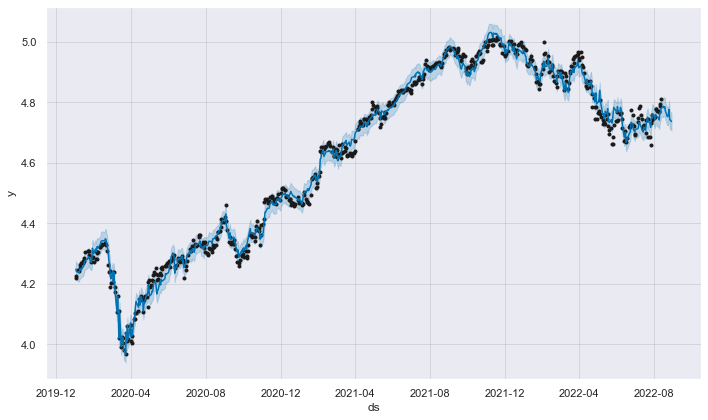

In [197]:
model_final.plot(forecast_model_final);

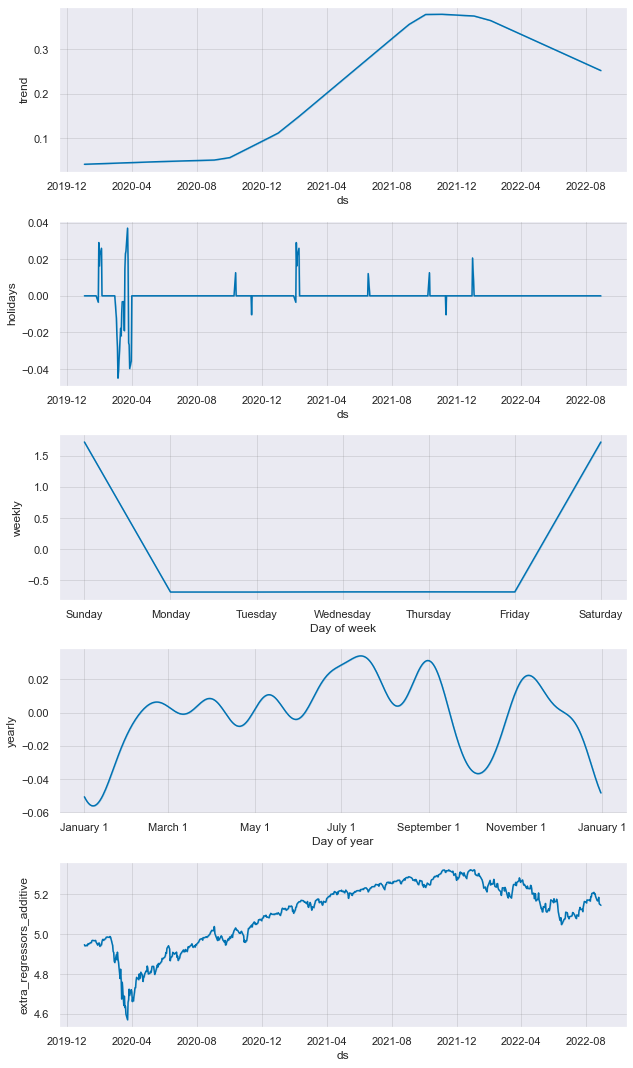

In [198]:
model_final.plot_components(forecast_model_final);

In [197]:
performance_model_final = pd.merge(test_log, forecast_model_final[["ds", "yhat", "yhat_lower", "yhat_upper"]][-17:], on="ds")

In [198]:
performance_model_final.shape

(11, 6)

In [199]:
performance_model_final

,ds,y,VTI_log,yhat,yhat_lower,yhat_upper
0,2022-08-15,4.811208,5.374259,4.784762,4.755094,4.813554
1,2022-08-16,4.808193,5.376389,4.787838,4.760325,4.820035
2,2022-08-17,4.790155,5.367377,4.782580,4.754216,4.813317
3,2022-08-18,4.794633,5.369987,4.786786,4.758951,4.816953
4,2022-08-19,4.771701,5.355595,4.773025,4.743515,4.802687
5,2022-08-22,4.745541,5.333974,4.754452,4.727050,4.784329
6,2022-08-23,4.742930,5.332091,4.754135,4.724509,4.782202
7,2022-08-24,4.742320,5.336287,4.762049,4.732298,4.790405
8,2022-08-25,4.768139,5.350673,4.777740,4.750420,4.807622
9,2022-08-26,4.712229,5.316992,4.744793,4.715504,4.773969


In [200]:
performance_model_final_mae = mean_absolute_error(performance_model_final["y"], performance_model_final["yhat"])
performance_model_final_mae

0.016323266974162563

In [201]:
performance_model_final_mape = mean_absolute_percentage_error(performance_model_final["y"], performance_model_final["yhat"])
performance_model_final_mape

0.0034344058774416846

__best mape after hyperparameter tuning__ ✔

## TO-DO: Manual time series forecast

# Manual Time Series Forecasting With ARIMA and Exponential Smoothing
---

In [202]:
import yfinance as yf
import prophet as Prophet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplfinance as mpl
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [203]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [204]:
ticker_list = ["GOOG"]

In [205]:
data_candle_plot = yf.Ticker("GOOG").history(period="3mo")
data_candle_plot

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-27,109.599998,114.400002,108.419998,113.599998,41474600,0,0
2022-07-28,112.800003,114.699997,111.850998,114.589996,23303800,0,0
2022-07-29,113.400002,116.900002,113.230003,116.639999,31336200,0,0
2022-08-01,115.529999,117.120003,114.690002,115.480003,22856200,0,0
2022-08-02,114.430000,117.080002,114.260002,115.900002,17911000,0,0
...,...,...,...,...,...,...,...
2022-10-21,98.459999,101.620003,98.230003,101.480003,28976000,0,0
2022-10-24,102.089996,103.099998,100.300003,102.970001,24680800,0,0
2022-10-25,103.300003,105.099998,103.019997,104.930000,29910200,0,0


### Just an example of candle plot. There is only 3 month data but we will work with almost 3 year data. Plotting all of the series would be not like candle plot.

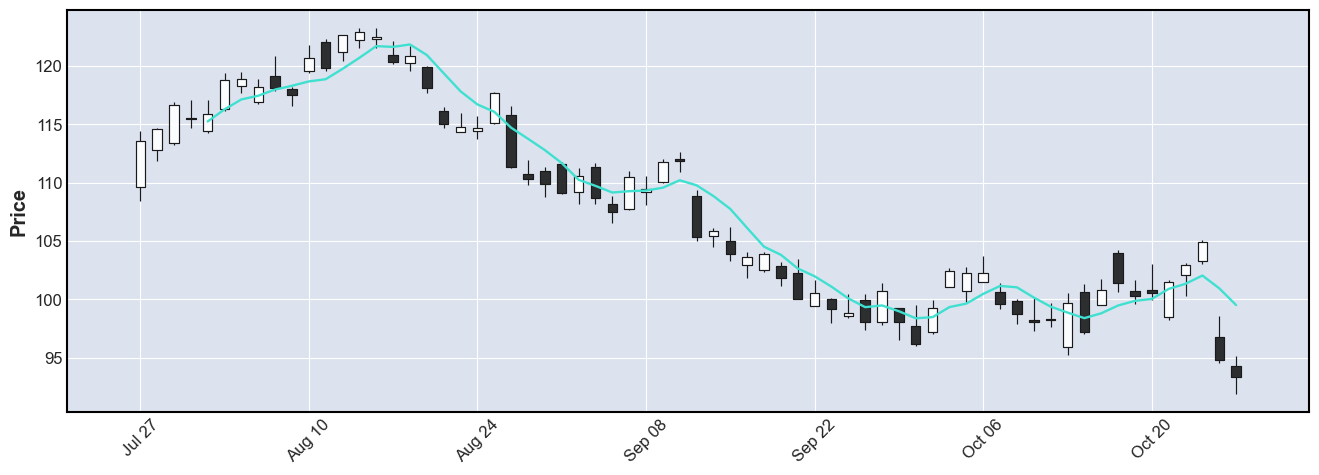

In [206]:
mpl.plot(data_candle_plot, type="candle", mav=(5), figratio=(30,10))

In [207]:
data = yf.download(ticker_list, start = start_date, end= end_date)[["Close"]]

data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2020-01-02,68.368500
2020-01-03,68.032997
2020-01-06,69.710503
2020-01-07,69.667000
2020-01-08,70.216003


### Before starting the analysis in a time series, the situation that needs to be checked is whether the data is stationary or not. The variance and mean over time need to be constant. We can briefly define it as follows; variance and mean are constant over time and the covariance of the variables in the two lagged time periods depends on the lag between the variables and not on time.

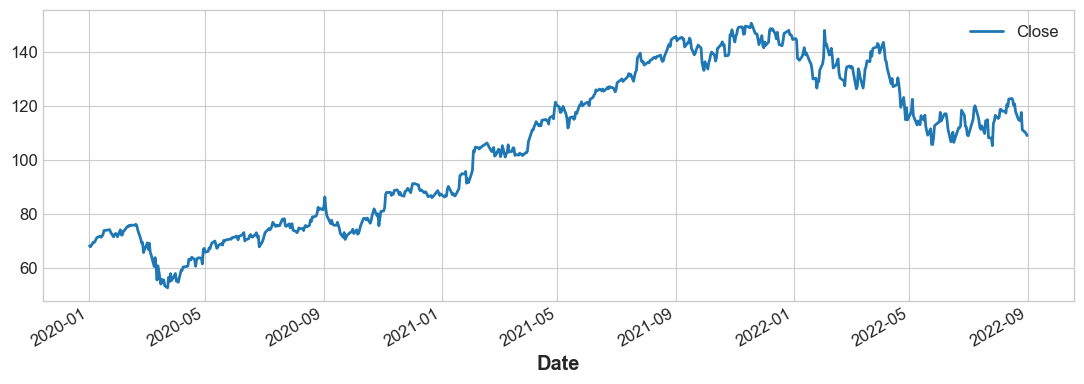

In [211]:
data.plot();

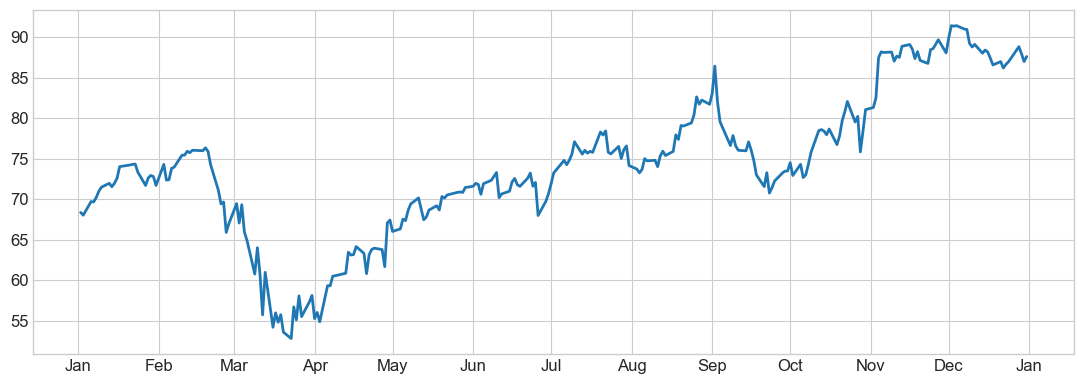

In [213]:
import matplotlib.dates as mdates
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')
plt.plot(data.loc["2020"])
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)
plt.show()

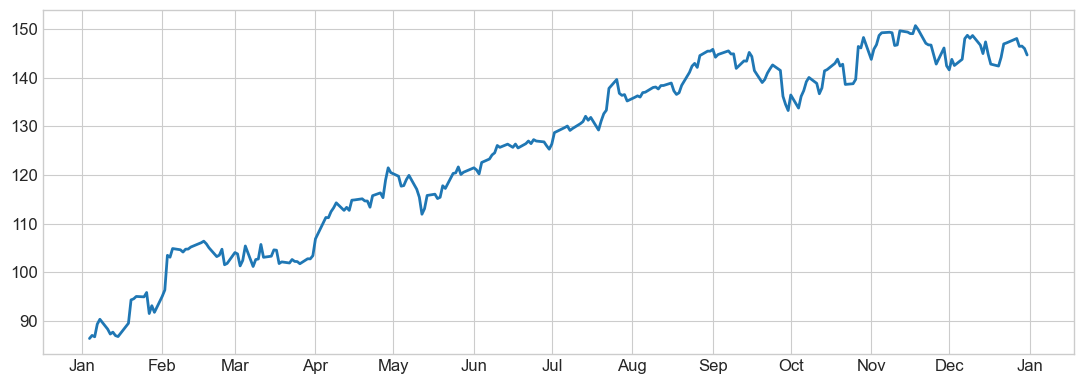

In [214]:
plt.plot(data.loc["2021"])
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

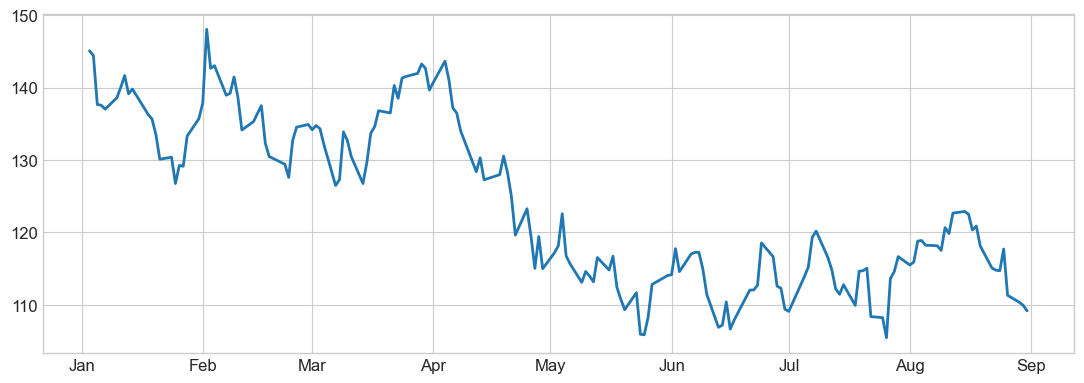

In [215]:
plt.plot(data.loc["2022"])
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()

### We can see that there is no seasonality. But we will apply Canova-Hansen Test to verify that later.

In [216]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [217]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-08-18', '2022-08-19', '2022-08-22', '2022-08-23',
               '2022-08-24', '2022-08-25', '2022-08-26', '2022-08-29',
               '2022-08-30', '2022-08-31'],
              dtype='datetime64[ns]', name='Date', length=672, freq=None)

In [218]:
data_with_bday = data.asfreq(freq="B", method="bfill")

In [219]:
decompose_data_business_day = seasonal_decompose(data_with_bday, model="additive")

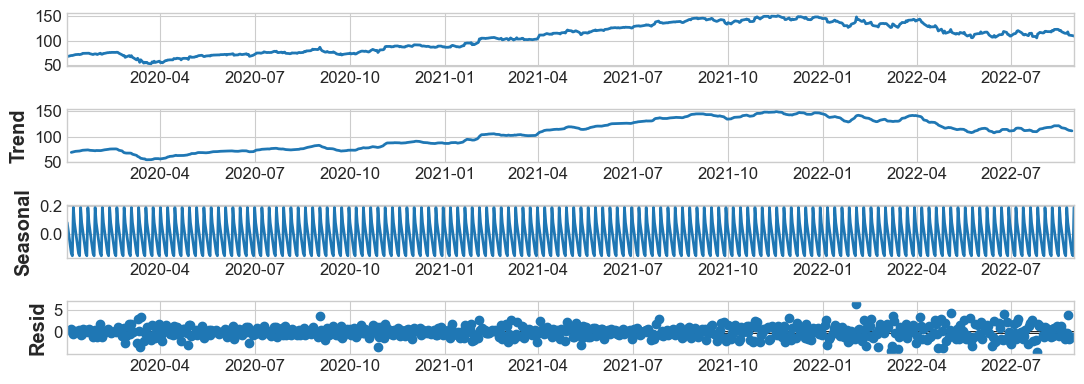

In [220]:
decompose_data_business_day.plot();

### Data has additive trend and maybe seasonality. We will test it.

In [221]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

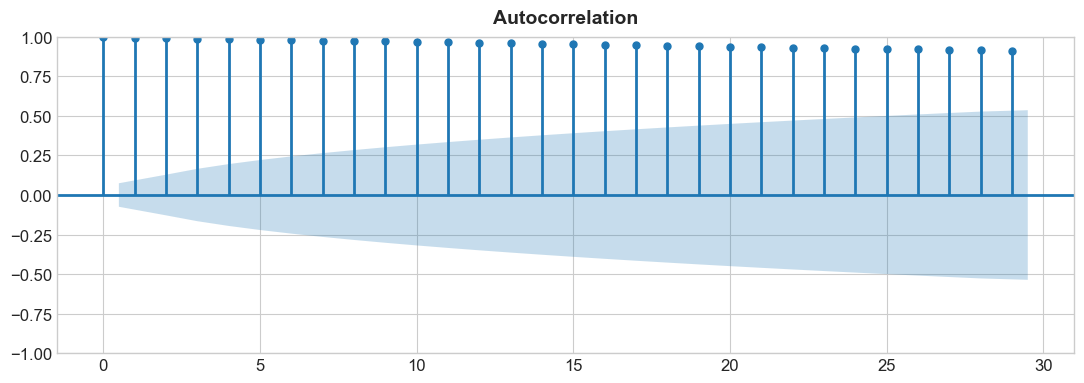

In [222]:
plot_acf(data_with_bday);

## There is serious autocorrelation problem in our data.

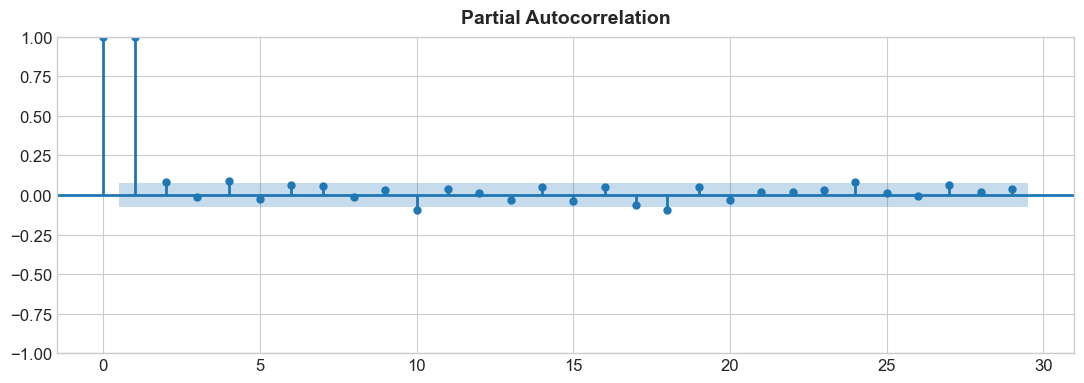

In [223]:
plot_pacf(data_with_bday);

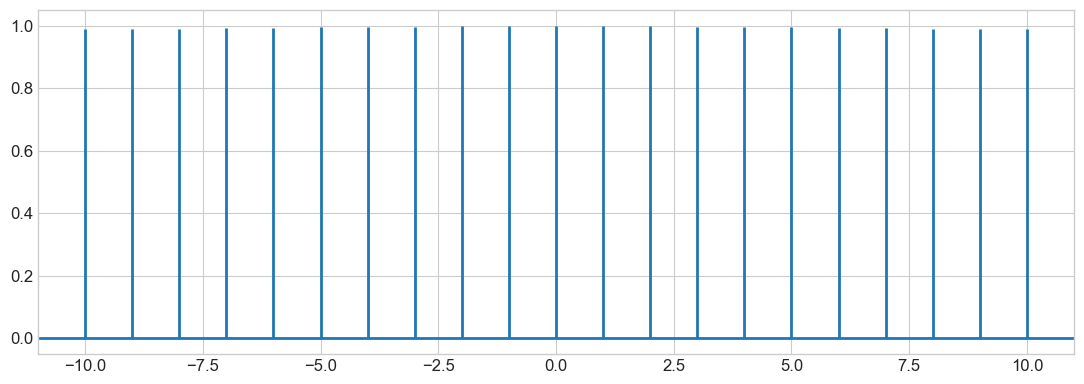

In [224]:
plt.acorr(data_with_bday["Close"], maxlags = 10)
plt.grid(True)
plt.show()

In [225]:
from statsmodels.tsa.stattools import adfuller, kpss

In [226]:
 dftest = adfuller(data_with_bday.Close, autolag = 'AIC')
 print("1. ADF : ",dftest[0])
 print("2. P-Value : ", dftest[1])
 print("3. Num Of Lags : ", dftest[2])
 print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
 print("5. Critical Values :")
 for key, val in dftest[4].items():
     print("\t",key, ": ", val) 

1. ADF :  -1.3298774469060481
2. P-Value :  0.6153949440095605
3. Num Of Lags :  3
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 691
5. Critical Values :
	 1% :  -3.4398489271901713
	 5% :  -2.8657317673059395
	 10% :  -2.569002221596252


## P-value > 0.05 so we can't reject Ho hypothesis. Data is not stationary.

## TO-DO Linear regression, OLS summary, trend check

In [227]:
import statsmodels.api as sm

In [228]:
lm_data = data_with_bday.copy()

In [229]:
lm_data["Time"] = np.arange(len(data_with_bday.index))

In [230]:
lm_data.head()

,Close,Time
Date,,
2020-01-02,68.368500,0
2020-01-03,68.032997,1
2020-01-06,69.710503,2
2020-01-07,69.667000,3
2020-01-08,70.216003,4


In [231]:
X = lm_data.loc[:, ["Time"]]
y = lm_data.loc[:,"Close"]

In [232]:
lm = sm.OLS(y, X)

In [233]:
model = lm.fit()

In [234]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              5553.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                        0.00
Time:                        18:41:55   Log-Likelihood:                         -3485.9
No. Observations:                 695   AIC:                                      6974.
Df Residuals:                     694   BIC:                                      6978.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time           0.2575      0.003     74.520      0.000       0.251       0.264
==============================================================================
Omnibus:                       94.157   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.849
Skew:                          -1.043   Prob(JB):                     3.86e-29
Kurtosis:                       3.412   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### With p-value we say, there is no seasonality and trend. But our data has autocorrelation so we cannot trust this information. It can be misleading because of autocorrelation.

In [235]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.889    
Dependent Variable:     Close            AIC:                         6973.8801
Date:                   2022-10-27 18:41 BIC:                         6978.4240
No. Observations:       695              Log-Likelihood:              -3485.9  
Df Model:               1                F-statistic:                 5553.    
Df Residuals:           694              Prob (F-statistic):          0.00     
R-squared (uncentered): 0.889            Scale:                       1332.8   
-------------------------------------------------------------------------------------
           Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
Time       0.2575         0.0035       74.5196       0.0000       0.2507       0.2642
-------------------------------------------------------------------------------
Omnibus:                   94.157           Durbin-Watson:              0.003  
Prob(Omnibus):             0.000            Jarque-Bera (JB):           130.849
Skew:                      -1.043           Prob(JB):                   0.000  
Kurtosis:                  3.412            Condition No.:              1      
===============================================================================

"""

### Traditional Methods have assumptions for creating a Time Series model.
- There should be no autocorrelation between residuals.
- The mean of the residuals should be zero.
- The variance of the residuals must be constant.
- Residuals should be normally distributed.
- It must be stationary

In [236]:
model.resid.head()

Date
2020-01-02    68.368500
2020-01-03    67.775539
2020-01-06    69.195586
2020-01-07    68.894624
2020-01-08    69.186169
Freq: B, dtype: float64

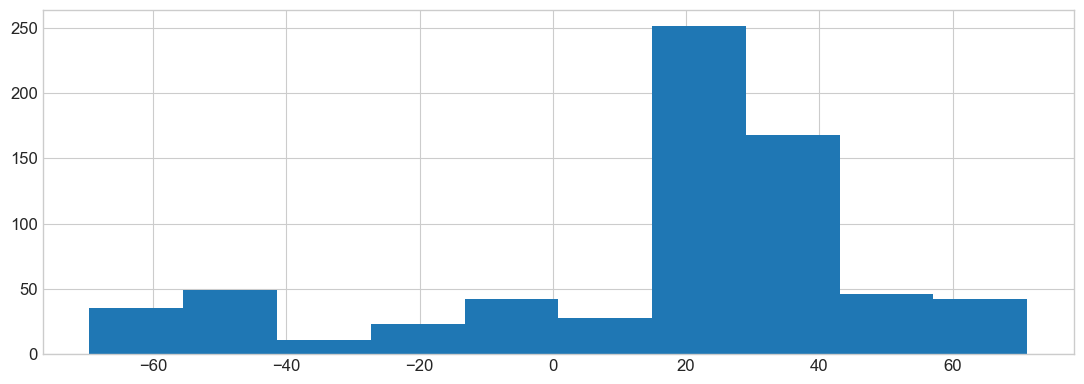

In [237]:
model.resid.hist();

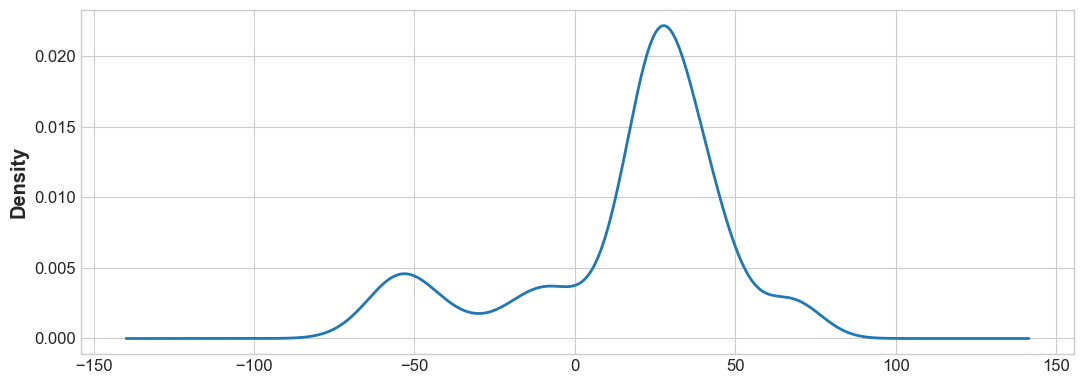

In [238]:
model.resid.plot(kind="kde");

### No normal distribution

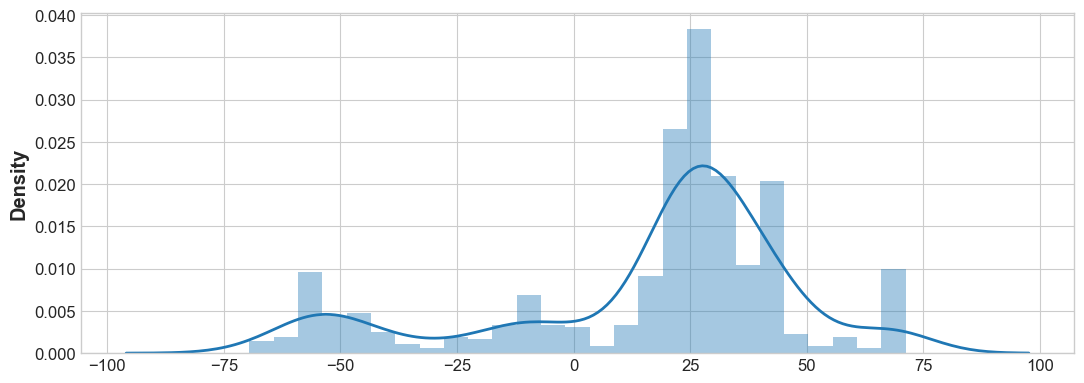

In [239]:
sns.distplot(model.resid, kde=True, hist=True);

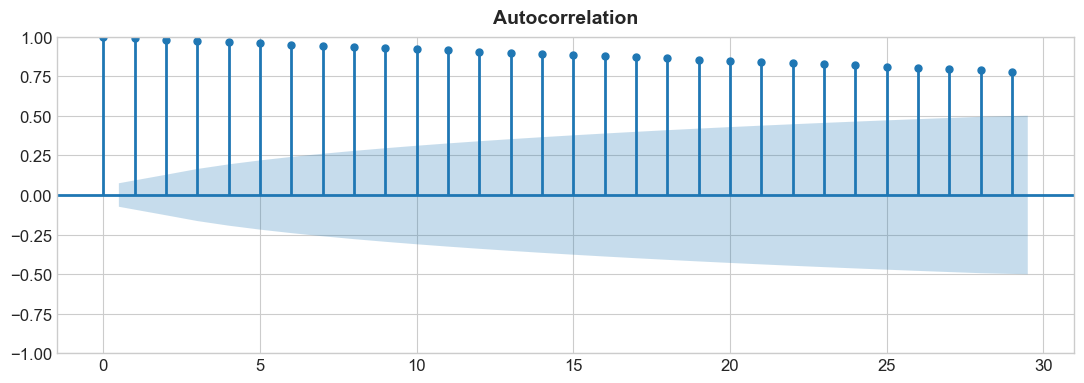

In [240]:
plot_acf(model.resid);

### Autocorrelation

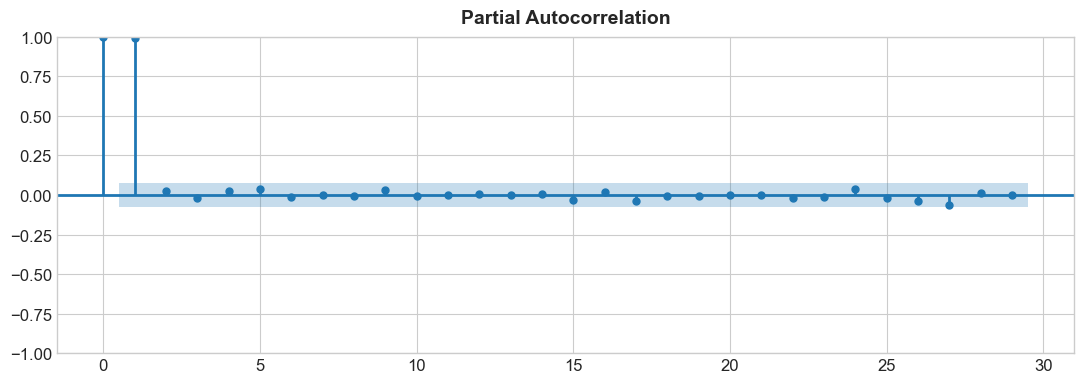

In [241]:
plot_pacf(model.resid);

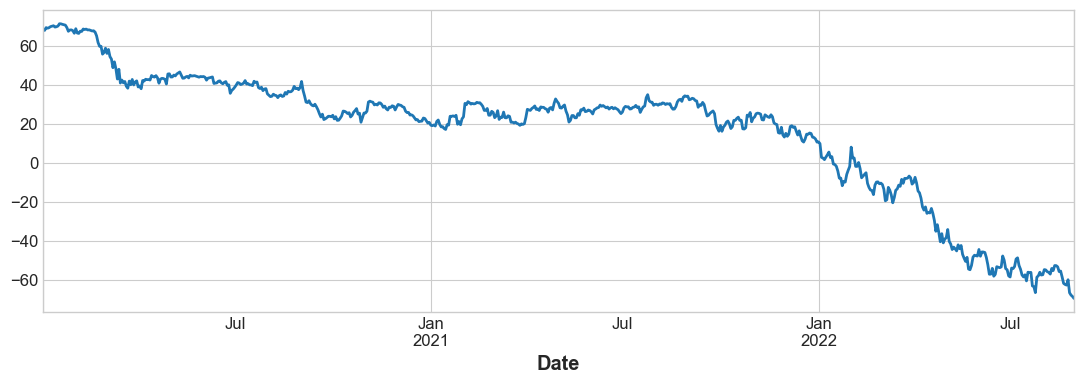

In [242]:
model.resid.plot();

### Not stationary, no constant variance, no zero mean. (negative trend)

## As you can see, no assumptions are made. In such a case, the model cannot be established. Normally, the steps to be followed in order before starting the analysis are:

- Seasonal Effect
- Trend
- Structural Break
- Stationarity

### First we remove trend.

In [243]:
dtrend_df = data_with_bday.copy()

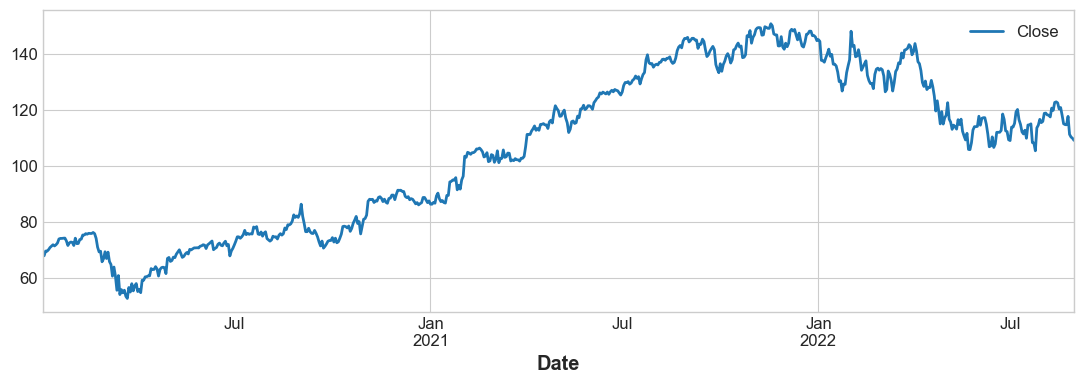

In [244]:
dtrend_df.plot();

### Detrending with scipy module

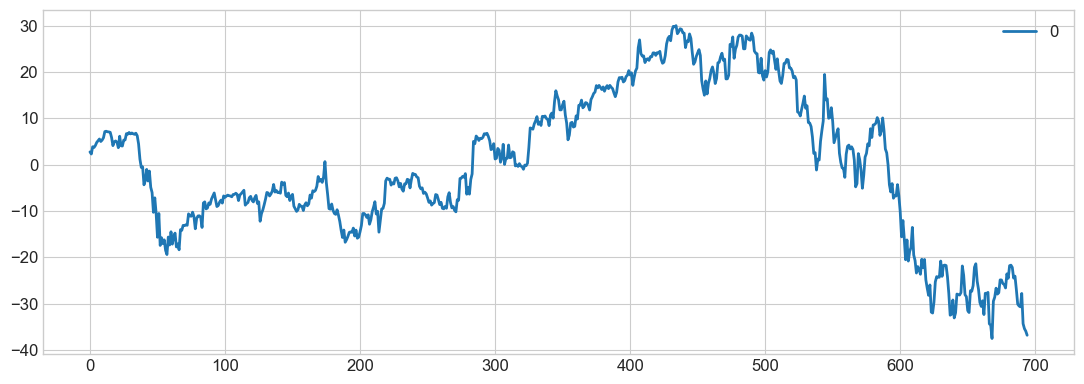

In [245]:
from scipy import signal

detrended = signal.detrend(dtrend_df.Close)

detrended_df = pd.DataFrame(detrended)
detrended_df.plot();

### After removing a linear trend, we also want to remove seasonality so that we can model the data.

In [246]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(dtrend_df.Close, model='additive', extrapolate_trend='freq')


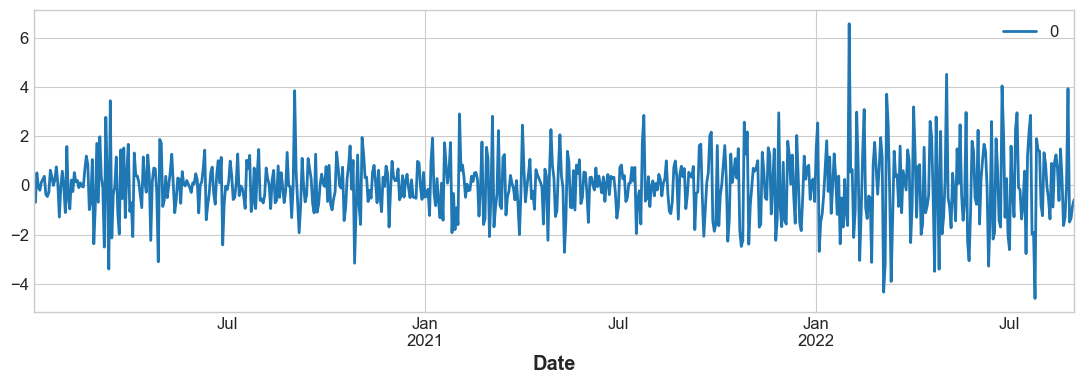

In [247]:
detrended = dtrend_df.Close - res.trend

detrended_df = pd.DataFrame(detrended)
detrended_df.plot();

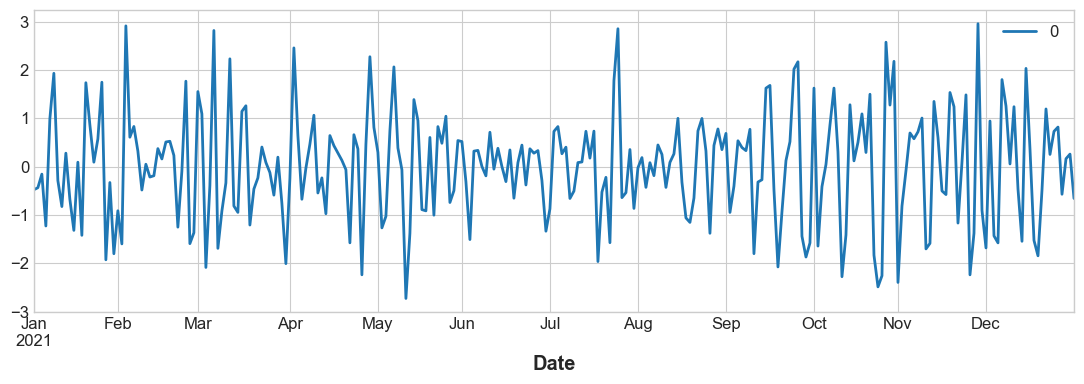

In [248]:
detrended_df["2021"].plot();

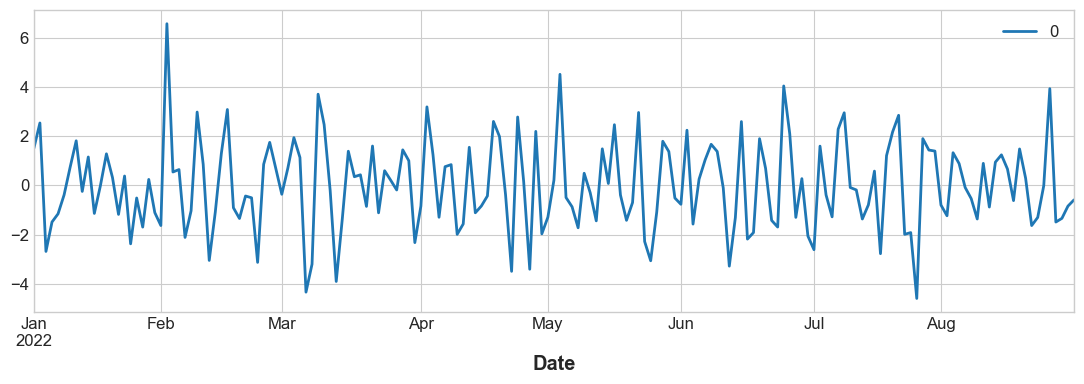

In [249]:
detrended_df["2022"].plot();

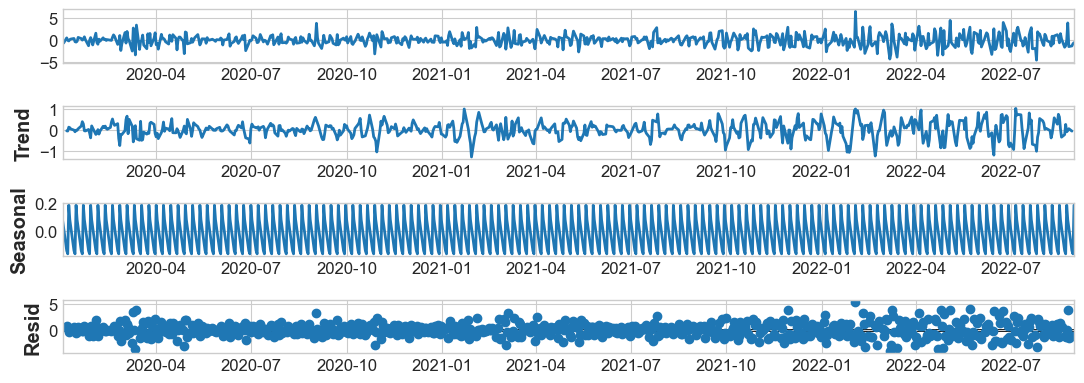

In [250]:
decompose_data_detrended = seasonal_decompose(detrended_df, model="additive")
decompose_data_detrended.plot();

In [251]:
detrended_df.columns = ["Close - Detrended"]

In [252]:
detrended_df.head()

,Close - Detrended
Date,
2020-01-02,0.169320
2020-01-03,-0.688453
2020-01-06,0.511502
2020-01-07,-0.056601
2020-01-08,-0.198299


### With Augmented Dickey-Fuller Test, we can say that our data is stationary.
---

In [253]:
dftest = adfuller(detrended_df["Close - Detrended"], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val) 
if dftest[0] < dftest[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

1. ADF :  -12.459797665066212
2. P-Value :  3.4261803256690885e-23
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 680
5. Critical Values :
	 1% :  -3.4400031721739515
	 5% :  -2.865799725091594
	 10% :  -2.569038427768166
Reject Ho - Time Series is Stationary


In [254]:
import statsmodels.api as sm

In [255]:
detrended_df["Time"] = np.arange(len(data_with_bday.index))

In [256]:
detrended_df.head()

,Close - Detrended,Time
Date,,
2020-01-02,0.169320,0
2020-01-03,-0.688453,1
2020-01-06,0.511502,2
2020-01-07,-0.056601,3
2020-01-08,-0.198299,4


In [257]:
X = detrended_df.loc[:, ["Time"]]
y = detrended_df.loc[:,"Close - Detrended"]

In [258]:
lm = sm.OLS(y, X)

In [259]:
model_detrended = lm.fit()

In [260]:
model_detrended.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Close - Detrended   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                           0.001530
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                       0.969
Time:                        18:42:41   Log-Likelihood:                         -1162.1
No. Observations:                 695   AIC:                                      2326.
Df Residuals:                     694   BIC:                                      2331.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Time       -4.772e-06      0.000     -0.039      0.969      -0.000       0.000
==============================================================================
Omnibus:                       30.650   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.455
Skew:                           0.182   Prob(JB):                     6.80e-17
Kurtosis:                       4.561   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
model_detrended.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS               Adj. R-squared (uncentered): -0.001   
Dependent Variable:     Close - Detrended AIC:                         2326.2328
Date:                   2022-10-27 18:42  BIC:                         2330.7767
No. Observations:       695               Log-Likelihood:              -1162.1  
Df Model:               1                 F-statistic:                 0.001530 
Df Residuals:           694               Prob (F-statistic):          0.969    
R-squared (uncentered): 0.000             Scale:                       1.6616   
-------------------------------------------------------------------------------------
               Coef.       Std.Err.         t         P>|t|        [0.025      0.975]
-------------------------------------------------------------------------------------
Time          -0.0000        0.0001      -0.0391      0.9688      -0.0002      0.0002
--------------------------------------------------------------------------------
Omnibus:                   30.650            Durbin-Watson:               2.046 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            74.455
Skew:                      0.182             Prob(JB):                    0.000 
Kurtosis:                  4.561             Condition No.:               1     
================================================================================

"""

In [262]:
y_pred = pd.Series(model_detrended.predict(X), index=X.index)

In [263]:
y_pred

Date
2020-01-02    0.000000
2020-01-03   -0.000005
2020-01-06   -0.000010
2020-01-07   -0.000014
2020-01-08   -0.000019
                ...   
2022-08-25   -0.003293
2022-08-26   -0.003298
2022-08-29   -0.003302
2022-08-30   -0.003307
2022-08-31   -0.003312
Freq: B, Length: 695, dtype: float64

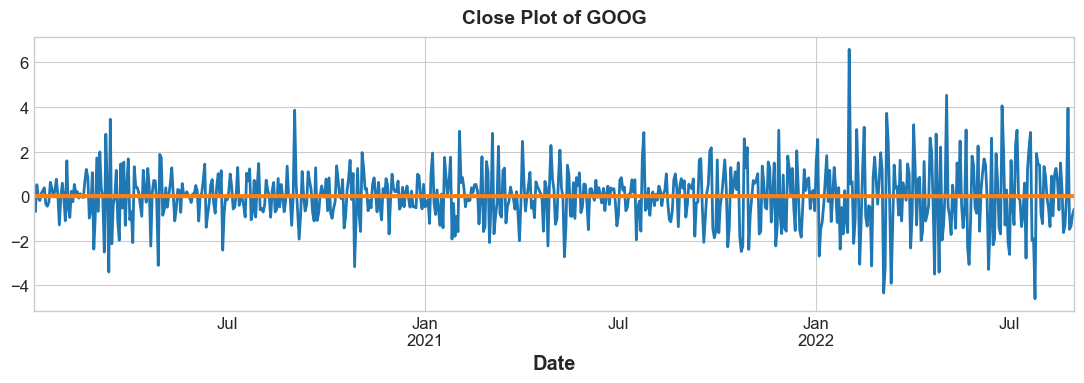

In [264]:
ax = y.plot()
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Close Plot of GOOG');

In [265]:
model_detrended.resid

Date
2020-01-02    0.169320
2020-01-03   -0.688448
2020-01-06    0.511512
2020-01-07   -0.056587
2020-01-08   -0.198280
                ...   
2022-08-25    3.941292
2022-08-26   -1.486699
2022-08-29   -1.336702
2022-08-30   -0.838688
2022-08-31   -0.584885
Freq: B, Length: 695, dtype: float64

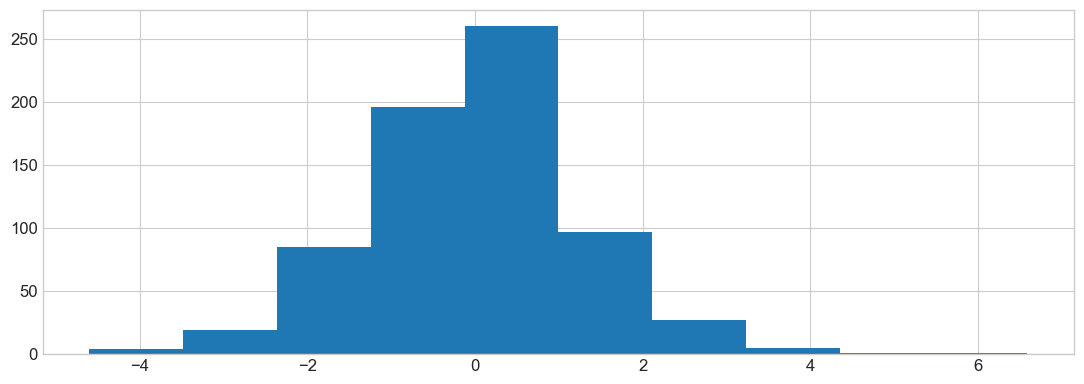

In [266]:
model_detrended.resid.hist();

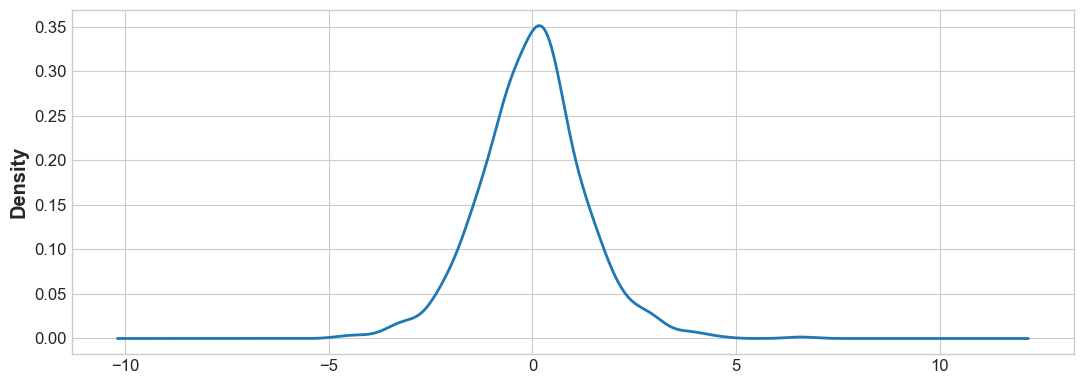

In [267]:
model_detrended.resid.plot(kind="kde");

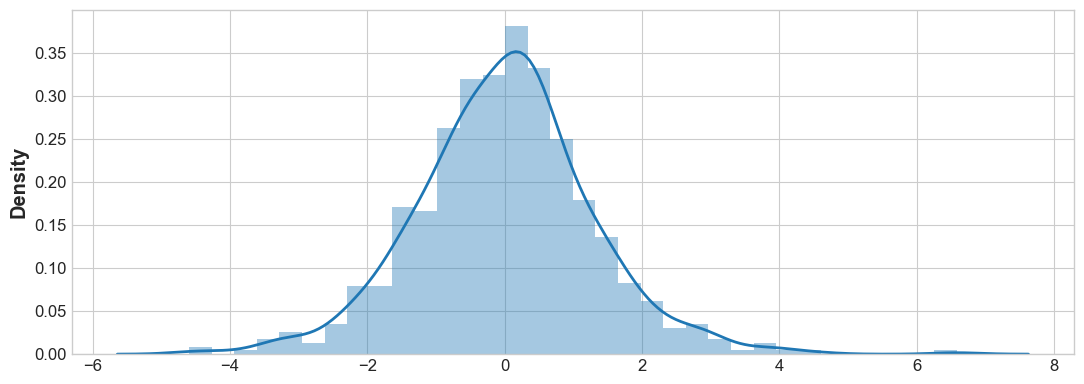

In [268]:
sns.distplot(model_detrended.resid, kde=True, hist=True);

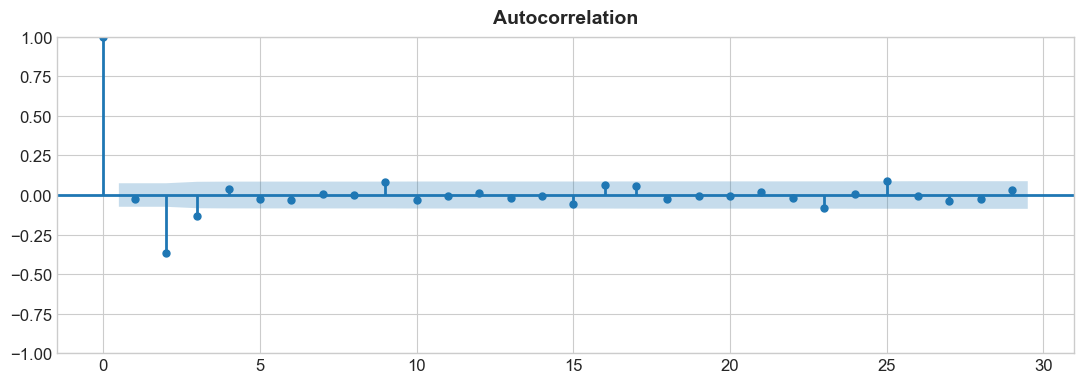

In [269]:
plot_acf(model_detrended.resid);

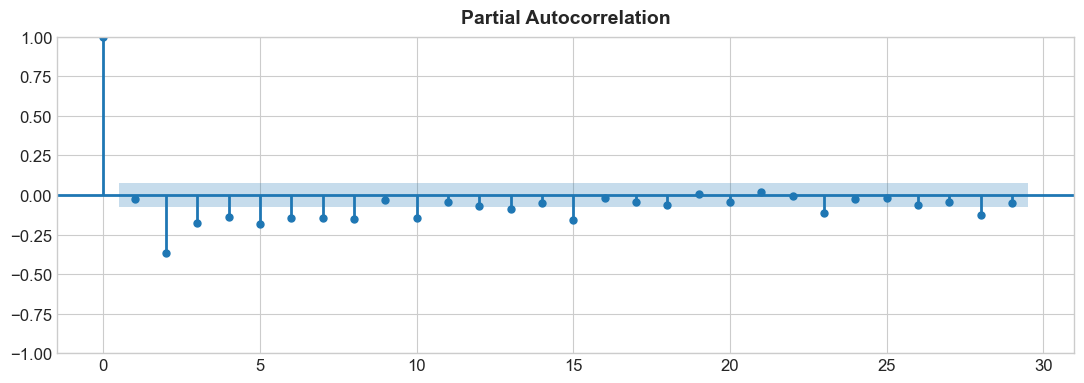

In [270]:
plot_pacf(model_detrended.resid);

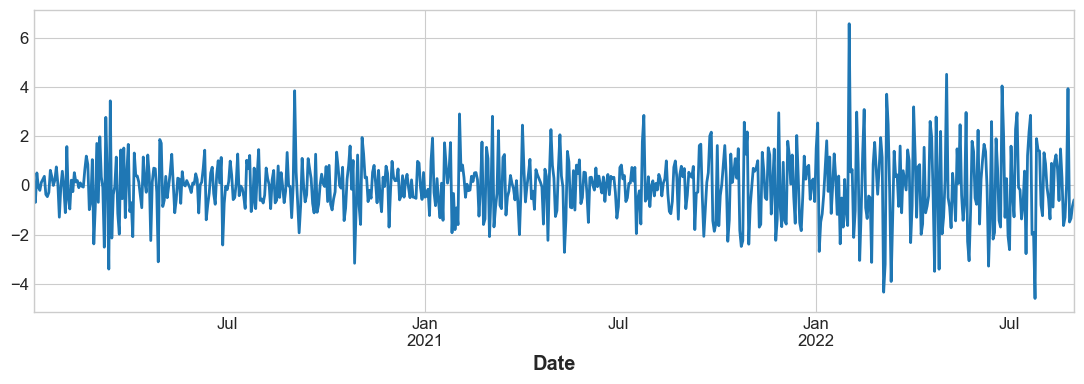

In [271]:
model_detrended.resid.plot();

### Our residuals are matching.

## TO-DO Create model

In [272]:
start_date = "2020-01-02"

end_date = "2022-09-01"

train_end_date = "2022-08-14"

In [273]:
dtrend_df = data_with_bday.copy()

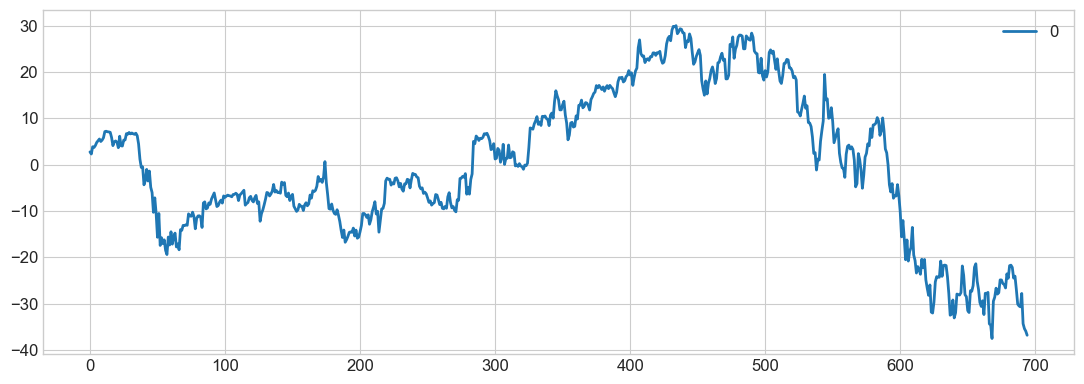

In [274]:
from scipy import signal

detrended = signal.detrend(dtrend_df.Close)

detrended_df = pd.DataFrame(detrended)
detrended_df.plot();

In [275]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(dtrend_df.Close, model='additive', extrapolate_trend='freq')

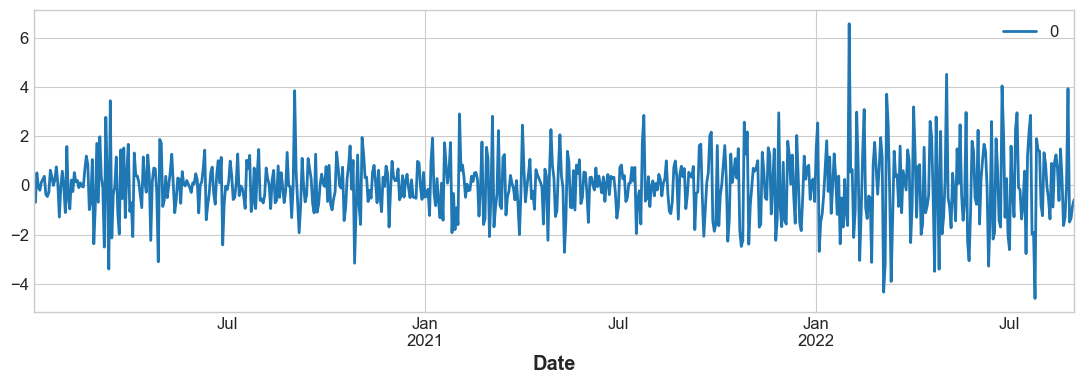

In [276]:
detrended = dtrend_df.Close - res.trend

detrended_df = pd.DataFrame(detrended)
detrended_df.plot();

In [277]:
dftest = adfuller(detrended_df, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val) 
if dftest[0] < dftest[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

1. ADF :  -12.459797665066212
2. P-Value :  3.4261803256690885e-23
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 680
5. Critical Values :
	 1% :  -3.4400031721739515
	 5% :  -2.865799725091594
	 10% :  -2.569038427768166
Reject Ho - Time Series is Stationary


### We did KPSS test for double check the stationarity addition to ADF.

---

In [278]:
def KPSS_statt(x):
     kpss_test = kpss(x)
     t_stat, p_value, _, critical_values  = kpss_test
     conclusion = "stationary" if p_value > 0.05 else "not stationary"
     res_dict = {"KPSS statistic":t_stat, "p-value":p_value, "should we difference?": (p_value < 0.05), "conclusion": conclusion}
     return res_dict

resKPSS = KPSS_statt(detrended_df)

print("KPSS test result for original data:")
[print(key, ":", value) for key,value in resKPSS.items()]

KPSS test result for original data:
KPSS statistic : 0.12005519253526035
p-value : 0.1
should we difference? : False
conclusion : stationary


[None, None, None, None]

### Splitting data for modelling.

In [279]:
detrended_df.shape

(695, 1)

In [280]:
train_detrended_df_ind = round((detrended_df.shape[0]*3) / 4)
test_detrended_df_ind = round(detrended_df.shape[0] / 4)

In [281]:
train_detrended_df_ind

521

In [282]:
test_detrended_df_ind

174

In [283]:
train_detrended_df = detrended_df.iloc[0:train_detrended_df_ind, :]
train_detrended_df.head()

,0
Date,
2020-01-02,0.169320
2020-01-03,-0.688453
2020-01-06,0.511502
2020-01-07,-0.056601
2020-01-08,-0.198299


In [284]:
train_detrended_df.shape

(521, 1)

In [285]:
test_detrended_df = detrended_df.iloc[train_detrended_df_ind:, :]
test_detrended_df.head()

,0
Date,
2021-12-31,-0.655997
2022-01-03,1.509192
2022-01-04,2.541504
2022-01-05,-2.686496
2022-01-06,-1.488907


In [286]:
test_detrended_df.shape

(174, 1)

In [287]:
detrended_df.head()

,0
Date,
2020-01-02,0.169320
2020-01-03,-0.688453
2020-01-06,0.511502
2020-01-07,-0.056601
2020-01-08,-0.198299


In [288]:
detrended_df.iloc[:,:]

,0
Date,
2020-01-02,0.169320
2020-01-03,-0.688453
2020-01-06,0.511502
2020-01-07,-0.056601
2020-01-08,-0.198299
...,...
2022-08-25,3.937999
2022-08-26,-1.489996
2022-08-29,-1.340004


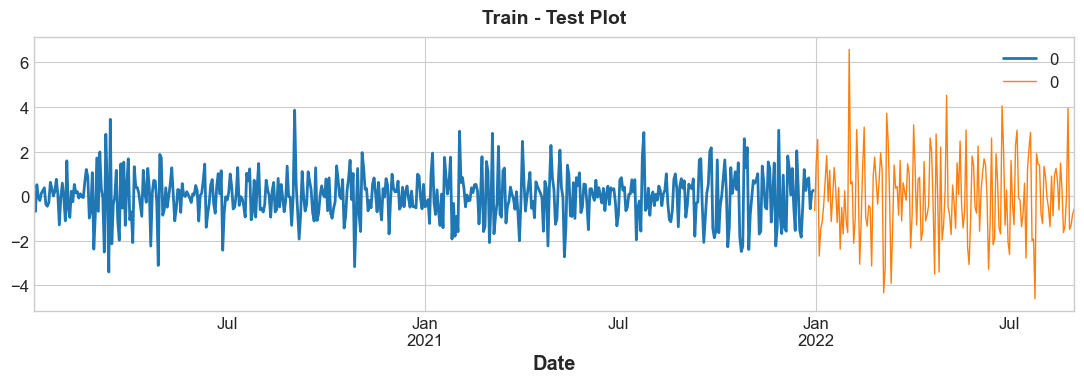

In [289]:
ax = train_detrended_df.plot()
ax = test_detrended_df.plot(ax=ax, linewidth=1)
ax.set_title('Train - Test Plot');

## TO-DO Compare OCSB and CH tests for seasonality stability.

In [290]:
from pmdarima.arima import CHTest, OCSBTest

In [291]:
x = CHTest(m=365).estimate_seasonal_differencing_term(detrended_df.iloc[:,:])

In [293]:
x

0

In [294]:
x_ocsb = OCSBTest(m=365).estimate_seasonal_differencing_term(detrended_df.iloc[:,:])

In [295]:
x_ocsb

0

### We run OCSB and Canova Hansen Tests for seasonality difference. The pmdarima implementations of both tests return the recommended orders of seasonal differencing. There is no seasonality in data we can see from results. Because we detrend and deseasonalize data before.

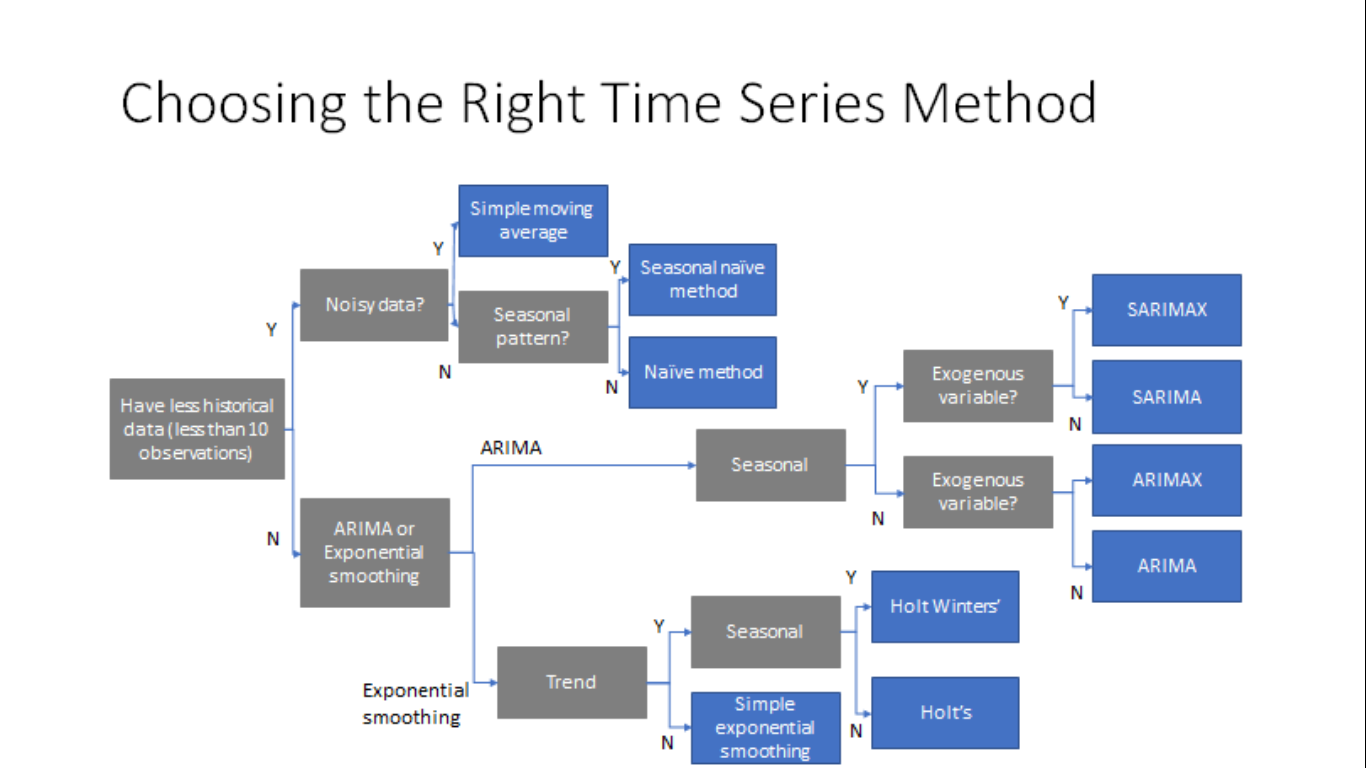

In [296]:
train_detrended_df

,0
Date,
2020-01-02,0.169320
2020-01-03,-0.688453
2020-01-06,0.511502
2020-01-07,-0.056601
2020-01-08,-0.198299
...,...
2021-12-24,0.730496
2021-12-27,0.819397
2021-12-28,-0.568600


In [297]:
test_detrended_df

,0
Date,
2021-12-31,-0.655997
2022-01-03,1.509192
2022-01-04,2.541504
2022-01-05,-2.686496
2022-01-06,-1.488907
...,...
2022-08-25,3.937999
2022-08-26,-1.489996
2022-08-29,-1.340004


## Exponential Smoothing
---

In [298]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_detrended_df)
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test_detrended_df.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test_detrended_df))

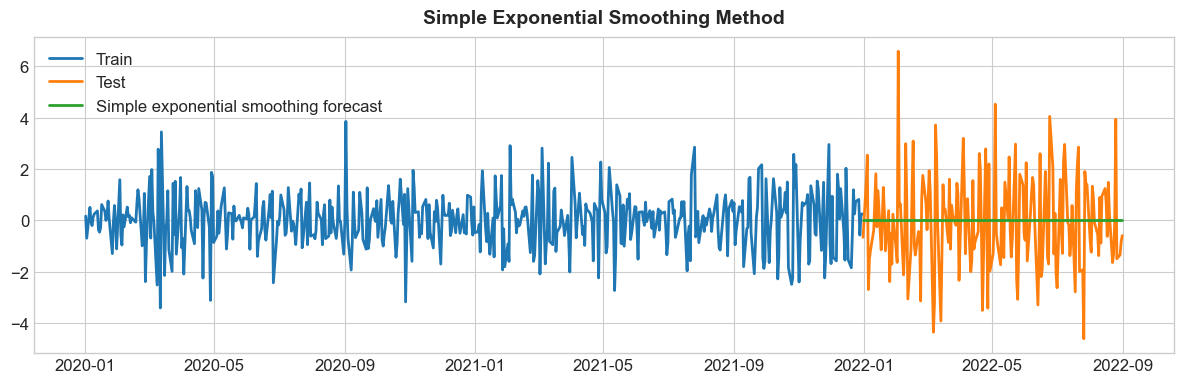

In [299]:
plt.figure(figsize=(12,4))
plt.plot(train_detrended_df, label='Train')
plt.plot(test_detrended_df, label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [300]:
mae_exp_smooth = mean_absolute_error(test_detrended_df, y_hat_ses["ses_forecast"])
mae_exp_smooth

1.4735025805270467

In [301]:
mape_exp_smooth = mean_absolute_percentage_error(test_detrended_df, y_hat_ses["ses_forecast"])
mape_exp_smooth

1.0030054367393453

## ARIMA Model
---

In [302]:
from statsmodels.tsa.arima.model import ARIMA

In [303]:
model = ARIMA(train_detrended_df, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const    -0.000271
ar.L1     0.497643
ma.L1    -0.999925
sigma2    0.825436
dtype: float64


In [304]:
y_hat_arima = test_detrended_df.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(test_detrended_df.index.min(), test_detrended_df.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

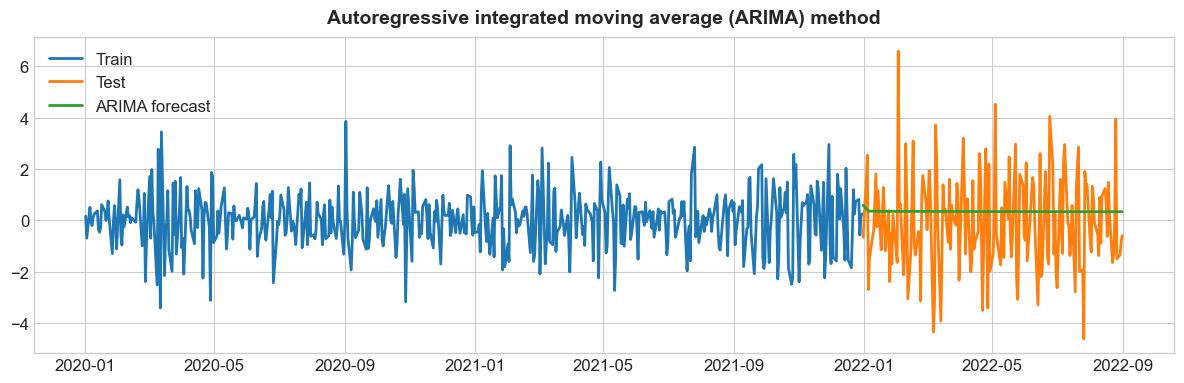

In [305]:
plt.figure(figsize=(12,4))
plt.plot(train_detrended_df, label='Train')
plt.plot(test_detrended_df, label='Test')
plt.plot(y_hat_arima['arima_forecast'][test_detrended_df.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [306]:
mae_arima = mean_absolute_error(test_detrended_df, y_hat_arima["arima_forecast"])
mae_arima

1.5104583081550909

In [307]:
mape_arima = mean_absolute_percentage_error(test_detrended_df, y_hat_arima["arima_forecast"])
mape_arima

1.5272095462208255

## As we expected, after the preprocessings, our dataset has no trend and seasonality and Exponential Smoothing has better mape.

### FB Prophet Results

- Prophet baseline mape = 0.061527476924947574
- Prophet model with seasonal attribute = 0.06060487000676184
- Prophet model with multivariate = 0.016130149784554192
- Prophet model with holiday and event effects = 0.015457785815145304
- Prophet model with holiday and event cross validation = 0.07171449934774392
- Prophet base model with cross validation = 0.1205387137061276
- Prophet model with hyperparameter changepoint_range cross-validation = 0.08285103648278128
- Prophet model with hyperparameter holiday/event/holiday_prior = 0.0152080.0034344058774416846701766066353
- Prophet model with hyperparameter grid search cross-validation = 0.016048606422456913
- Prophet model with hyperparameter grid search = 0.0034344058774416846

### Traditional Methods Results

- Simple Exponential Smoothing = 1.0030054367393453
- ARIMA = 1.5272095462208255

# End of analysis